# Part 3 : The international diversification strategy

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_theme()
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv('merged_all_data.csv', index_col=0)

df = df.drop(columns={col for col in df.columns if col.startswith(('fic', 'currency'))})
df.head()

mportret_AUSTRALIA  mportretx_AUSTRALIA  mportret_SWITZERLAND  \
date                                                                        
2002-01-31            0.027358             0.027313             -0.022126   
2002-02-28           -0.001832            -0.004358              0.011661   
2002-03-28            0.005199            -0.001914              0.048759   
2002-04-30           -0.014302            -0.015424             -0.004109   
2002-05-31           -0.000204            -0.001752              0.002963   

            mportretx_SWITZERLAND  mportret_GERMANY  mportretx_GERMANY  \
date                                                                     
2002-01-31              -0.022146          0.012277           0.011491   
2002-02-28               0.011646         -0.008807          -0.008816   
2002-03-28               0.045570          0.049328           0.048470   
2002-04-30              -0.007961         -0.045031          -0.047093   
2002-05-31              -0.000639         -0.025703          -0.033068   

            mportret_FRANCE  mportretx_FRANCE  mportret_UNITED KINGDOM  \
date                                                                     
2002-01-31        -0.027105         -0.027306                -0.010866   
2002-02-28        -0.004394         -0.004447                -0.003341   
2002-03-28         0.052081          0.051943                 0.038930   
2002-04-30        -0.043988         -0.045755                -0.013362   
2002-05-31        -0.028016         -0.035487                -0.011482   

            mportretx_UNITED KINGDOM  mportret_JAPAN  mportretx_JAPAN  \
date                                                                    
2002-01-31                 -0.011720       -0.056655        -0.056710   
2002-02-28                 -0.007072        0.042256         0.041998   
2002-03-28                  0.033661        0.053119         0.048294   
2002-04-30                 -0.015411        0.020586         0.020574   
2002-05-31                 -0.013937        0.035987         0.035920   

               rm_US     rf_US  fx_USUK  fx_SZUS   fx_JPUS  fx_USAL  fx_USEU  \
date                                                                           
2002-01-31 -0.015966  0.001408   1.4322   1.6709  132.6833   0.5170   0.8832   
2002-02-28 -0.021700  0.001444   1.4227   1.6970  133.6426   0.5128   0.8707   
2002-03-28  0.044698  0.001425   1.4230   1.6743  131.0610   0.5256   0.8766   
2002-04-30 -0.049600  0.001461   1.4429   1.6542  130.7718   0.5352   0.8860   
2002-05-31 -0.010510  0.001408   1.4598   1.5889  126.3750   0.5498   0.9170   

            euro_interbank  ch_interbank  us_interbank  australia_interbank  \
date                                                                          
2002-01-31        3.338773      1.603725          1.74                 4.26   
2002-02-28        3.357100      1.566671          1.82                 4.31   
2002-03-28        3.390800      1.604164          1.91                 4.46   
2002-04-30        3.406905      1.460647          1.87                 4.59   
2002-05-31        3.467136      1.163494          1.82                 4.84   

            japan_interbank  uk_interbank  
date                                       
2002-01-31              NaN       4.04677  
2002-02-28              NaN       4.05268  
2002-03-28              NaN       4.13055  
2002-04-30             0.10       4.17319  
2002-05-31             0.08       4.15370

## **(a)** Returns computed in USD

In [7]:
mapping = {
    'AUSTRALIA' : 'AUS',
    'SWITZERLAND' : 'CHE',
    'GERMANY' : 'DEU',
    'FRANCE' : 'FRA',
    'UNITED KINGDOM' : 'UK',
    'JAPAN' : 'JPN'
}
columns_to_rename = {col for col in df.columns if col.split('_')[-1] in mapping.keys()}

df = df.rename(columns={col: col.replace(col.split('_')[1], mapping[col.split('_')[1]]) for col in columns_to_rename})

df.head()

mportret_AUS  mportretx_AUS  mportret_CHE  mportretx_CHE  \
date                                                                   
2002-01-31      0.027358       0.027313     -0.022126      -0.022146   
2002-02-28     -0.001832      -0.004358      0.011661       0.011646   
2002-03-28      0.005199      -0.001914      0.048759       0.045570   
2002-04-30     -0.014302      -0.015424     -0.004109      -0.007961   
2002-05-31     -0.000204      -0.001752      0.002963      -0.000639   

            mportret_DEU  mportretx_DEU  mportret_FRA  mportretx_FRA  \
date                                                                   
2002-01-31      0.012277       0.011491     -0.027105      -0.027306   
2002-02-28     -0.008807      -0.008816     -0.004394      -0.004447   
2002-03-28      0.049328       0.048470      0.052081       0.051943   
2002-04-30     -0.045031      -0.047093     -0.043988      -0.045755   
2002-05-31     -0.025703      -0.033068     -0.028016      -0.035487   

            mportret_UK  mportretx_UK  mportret_JPN  mportretx_JPN     rm_US  \
date                                                                           
2002-01-31    -0.010866     -0.011720     -0.056655      -0.056710 -0.015966   
2002-02-28    -0.003341     -0.007072      0.042256       0.041998 -0.021700   
2002-03-28     0.038930      0.033661      0.053119       0.048294  0.044698   
2002-04-30    -0.013362     -0.015411      0.020586       0.020574 -0.049600   
2002-05-31    -0.011482     -0.013937      0.035987       0.035920 -0.010510   

               rf_US  fx_USUK  fx_SZUS   fx_JPUS  fx_USAL  fx_USEU  \
date                                                                 
2002-01-31  0.001408   1.4322   1.6709  132.6833   0.5170   0.8832   
2002-02-28  0.001444   1.4227   1.6970  133.6426   0.5128   0.8707   
2002-03-28  0.001425   1.4230   1.6743  131.0610   0.5256   0.8766   
2002-04-30  0.001461   1.4429   1.6542  130.7718   0.5352   0.8860   
2002-05-31  0.001408   1.4598   1.5889  126.3750   0.5498   0.9170   

            euro_interbank  ch_interbank  us_interbank  australia_interbank  \
date                                                                          
2002-01-31        3.338773      1.603725          1.74                 4.26   
2002-02-28        3.357100      1.566671          1.82                 4.31   
2002-03-28        3.390800      1.604164          1.91                 4.46   
2002-04-30        3.406905      1.460647          1.87                 4.59   
2002-05-31        3.467136      1.163494          1.82                 4.84   

            japan_interbank  uk_interbank  
date                                       
2002-01-31              NaN       4.04677  
2002-02-28              NaN       4.05268  
2002-03-28              NaN       4.13055  
2002-04-30             0.10       4.17319  
2002-05-31             0.08       4.15370

In [8]:
df['fx_USSZ'] = 1 / df['fx_SZUS']
df['fx_USJP'] = 1 / df['fx_JPUS']

df = df.drop(columns=['fx_SZUS', 'fx_JPUS'])

df.head()

mportret_AUS  mportretx_AUS  mportret_CHE  mportretx_CHE  \
date                                                                   
2002-01-31      0.027358       0.027313     -0.022126      -0.022146   
2002-02-28     -0.001832      -0.004358      0.011661       0.011646   
2002-03-28      0.005199      -0.001914      0.048759       0.045570   
2002-04-30     -0.014302      -0.015424     -0.004109      -0.007961   
2002-05-31     -0.000204      -0.001752      0.002963      -0.000639   

            mportret_DEU  mportretx_DEU  mportret_FRA  mportretx_FRA  \
date                                                                   
2002-01-31      0.012277       0.011491     -0.027105      -0.027306   
2002-02-28     -0.008807      -0.008816     -0.004394      -0.004447   
2002-03-28      0.049328       0.048470      0.052081       0.051943   
2002-04-30     -0.045031      -0.047093     -0.043988      -0.045755   
2002-05-31     -0.025703      -0.033068     -0.028016      -0.035487   

            mportret_UK  mportretx_UK  mportret_JPN  mportretx_JPN     rm_US  \
date                                                                           
2002-01-31    -0.010866     -0.011720     -0.056655      -0.056710 -0.015966   
2002-02-28    -0.003341     -0.007072      0.042256       0.041998 -0.021700   
2002-03-28     0.038930      0.033661      0.053119       0.048294  0.044698   
2002-04-30    -0.013362     -0.015411      0.020586       0.020574 -0.049600   
2002-05-31    -0.011482     -0.013937      0.035987       0.035920 -0.010510   

               rf_US  fx_USUK  fx_USAL  fx_USEU  euro_interbank  ch_interbank  \
date                                                                            
2002-01-31  0.001408   1.4322   0.5170   0.8832        3.338773      1.603725   
2002-02-28  0.001444   1.4227   0.5128   0.8707        3.357100      1.566671   
2002-03-28  0.001425   1.4230   0.5256   0.8766        3.390800      1.604164   
2002-04-30  0.001461   1.4429   0.5352   0.8860        3.406905      1.460647   
2002-05-31  0.001408   1.4598   0.5498   0.9170        3.467136      1.163494   

            us_interbank  australia_interbank  japan_interbank  uk_interbank  \
date                                                                           
2002-01-31          1.74                 4.26              NaN       4.04677   
2002-02-28          1.82                 4.31              NaN       4.05268   
2002-03-28          1.91                 4.46              NaN       4.13055   
2002-04-30          1.87                 4.59             0.10       4.17319   
2002-05-31          1.82                 4.84             0.08       4.15370   

             fx_USSZ   fx_USJP  
date                            
2002-01-31  0.598480  0.007537  
2002-02-28  0.589275  0.007483  
2002-03-28  0.597265  0.007630  
2002-04-30  0.604522  0.007647  
2002-05-31  0.629366  0.007913

In [9]:
mapping_fx_columns = {
    'fx_USUK' : 'fx_US_UK',
    'fx_USAL' : 'fx_US_AL',
    'fx_USEU' : 'fx_US_EUR',
    'fx_USSZ' : 'fx_US_CHF',
    'fx_USJP' : 'fx_US_JPY'
}

fx_columns = [col for col in df.columns if col.startswith('fx_')]

df = df.rename(columns={col: mapping_fx_columns[col] for col in fx_columns if col in fx_columns})

df.head()

mportret_AUS  mportretx_AUS  mportret_CHE  mportretx_CHE  \
date                                                                   
2002-01-31      0.027358       0.027313     -0.022126      -0.022146   
2002-02-28     -0.001832      -0.004358      0.011661       0.011646   
2002-03-28      0.005199      -0.001914      0.048759       0.045570   
2002-04-30     -0.014302      -0.015424     -0.004109      -0.007961   
2002-05-31     -0.000204      -0.001752      0.002963      -0.000639   

            mportret_DEU  mportretx_DEU  mportret_FRA  mportretx_FRA  \
date                                                                   
2002-01-31      0.012277       0.011491     -0.027105      -0.027306   
2002-02-28     -0.008807      -0.008816     -0.004394      -0.004447   
2002-03-28      0.049328       0.048470      0.052081       0.051943   
2002-04-30     -0.045031      -0.047093     -0.043988      -0.045755   
2002-05-31     -0.025703      -0.033068     -0.028016      -0.035487   

            mportret_UK  mportretx_UK  mportret_JPN  mportretx_JPN     rm_US  \
date                                                                           
2002-01-31    -0.010866     -0.011720     -0.056655      -0.056710 -0.015966   
2002-02-28    -0.003341     -0.007072      0.042256       0.041998 -0.021700   
2002-03-28     0.038930      0.033661      0.053119       0.048294  0.044698   
2002-04-30    -0.013362     -0.015411      0.020586       0.020574 -0.049600   
2002-05-31    -0.011482     -0.013937      0.035987       0.035920 -0.010510   

               rf_US  fx_US_UK  fx_US_AL  fx_US_EUR  euro_interbank  \
date                                                                  
2002-01-31  0.001408    1.4322    0.5170     0.8832        3.338773   
2002-02-28  0.001444    1.4227    0.5128     0.8707        3.357100   
2002-03-28  0.001425    1.4230    0.5256     0.8766        3.390800   
2002-04-30  0.001461    1.4429    0.5352     0.8860        3.406905   
2002-05-31  0.001408    1.4598    0.5498     0.9170        3.467136   

            ch_interbank  us_interbank  australia_interbank  japan_interbank  \
date                                                                           
2002-01-31      1.603725          1.74                 4.26              NaN   
2002-02-28      1.566671          1.82                 4.31              NaN   
2002-03-28      1.604164          1.91                 4.46              NaN   
2002-04-30      1.460647          1.87                 4.59             0.10   
2002-05-31      1.163494          1.82                 4.84             0.08   

            uk_interbank  fx_US_CHF  fx_US_JPY  
date                                            
2002-01-31       4.04677   0.598480   0.007537  
2002-02-28       4.05268   0.589275   0.007483  
2002-03-28       4.13055   0.597265   0.007630  
2002-04-30       4.17319   0.604522   0.007647  
2002-05-31       4.15370   0.629366   0.007913

In [10]:
fx_columns = [ col for col in df.columns if col.startswith('fx_') and not col.endswith('_ret') ]

for fx_col in fx_columns:
    df[f'{fx_col}_ret'] = df[fx_col].pct_change()
    df[f'{fx_col}_ret'] = df[f'{fx_col}_ret'].shift(-1)

df.head()

mportret_AUS  mportretx_AUS  mportret_CHE  mportretx_CHE  \
date                                                                   
2002-01-31      0.027358       0.027313     -0.022126      -0.022146   
2002-02-28     -0.001832      -0.004358      0.011661       0.011646   
2002-03-28      0.005199      -0.001914      0.048759       0.045570   
2002-04-30     -0.014302      -0.015424     -0.004109      -0.007961   
2002-05-31     -0.000204      -0.001752      0.002963      -0.000639   

            mportret_DEU  mportretx_DEU  mportret_FRA  mportretx_FRA  \
date                                                                   
2002-01-31      0.012277       0.011491     -0.027105      -0.027306   
2002-02-28     -0.008807      -0.008816     -0.004394      -0.004447   
2002-03-28      0.049328       0.048470      0.052081       0.051943   
2002-04-30     -0.045031      -0.047093     -0.043988      -0.045755   
2002-05-31     -0.025703      -0.033068     -0.028016      -0.035487   

            mportret_UK  mportretx_UK  mportret_JPN  mportretx_JPN     rm_US  \
date                                                                           
2002-01-31    -0.010866     -0.011720     -0.056655      -0.056710 -0.015966   
2002-02-28    -0.003341     -0.007072      0.042256       0.041998 -0.021700   
2002-03-28     0.038930      0.033661      0.053119       0.048294  0.044698   
2002-04-30    -0.013362     -0.015411      0.020586       0.020574 -0.049600   
2002-05-31    -0.011482     -0.013937      0.035987       0.035920 -0.010510   

               rf_US  fx_US_UK  fx_US_AL  fx_US_EUR  euro_interbank  \
date                                                                  
2002-01-31  0.001408    1.4322    0.5170     0.8832        3.338773   
2002-02-28  0.001444    1.4227    0.5128     0.8707        3.357100   
2002-03-28  0.001425    1.4230    0.5256     0.8766        3.390800   
2002-04-30  0.001461    1.4429    0.5352     0.8860        3.406905   
2002-05-31  0.001408    1.4598    0.5498     0.9170        3.467136   

            ch_interbank  us_interbank  australia_interbank  japan_interbank  \
date                                                                           
2002-01-31      1.603725          1.74                 4.26              NaN   
2002-02-28      1.566671          1.82                 4.31              NaN   
2002-03-28      1.604164          1.91                 4.46              NaN   
2002-04-30      1.460647          1.87                 4.59             0.10   
2002-05-31      1.163494          1.82                 4.84             0.08   

            uk_interbank  fx_US_CHF  fx_US_JPY  fx_US_UK_ret  fx_US_AL_ret  \
date                                                                         
2002-01-31       4.04677   0.598480   0.007537     -0.006633     -0.008124   
2002-02-28       4.05268   0.589275   0.007483      0.000211      0.024961   
2002-03-28       4.13055   0.597265   0.007630      0.013985      0.018265   
2002-04-30       4.17319   0.604522   0.007647      0.011713      0.027280   
2002-05-31       4.15370   0.629366   0.007913      0.016372      0.033467   

            fx_US_EUR_ret  fx_US_CHF_ret  fx_US_JPY_ret  
date                                                     
2002-01-31      -0.014153      -0.015380      -0.007178  
2002-02-28       0.006776       0.013558       0.019698  
2002-03-28       0.010723       0.012151       0.002211  
2002-04-30       0.034989       0.041098       0.034792  
2002-05-31       0.042639       0.031820       0.025018

In [11]:
fx_mapping = {
    'AUS': 'fx_US_AL_ret',
    'CHE': 'fx_US_CHF_ret',
    'DEU': 'fx_US_EUR_ret',
    'FRA': 'fx_US_EUR_ret',
    'UK': 'fx_US_UK_ret',
    'JPN': 'fx_US_JPY_ret'
}

for col in [col for col in df.columns if col.startswith('mportret_')]:
    
    df[f'{col}_us_adjusted'] = df[col] * ( 1 + df[fx_mapping[col.split('_')[1]]])

df.head()

mportret_AUS  mportretx_AUS  mportret_CHE  mportretx_CHE  \
date                                                                   
2002-01-31      0.027358       0.027313     -0.022126      -0.022146   
2002-02-28     -0.001832      -0.004358      0.011661       0.011646   
2002-03-28      0.005199      -0.001914      0.048759       0.045570   
2002-04-30     -0.014302      -0.015424     -0.004109      -0.007961   
2002-05-31     -0.000204      -0.001752      0.002963      -0.000639   

            mportret_DEU  mportretx_DEU  mportret_FRA  mportretx_FRA  \
date                                                                   
2002-01-31      0.012277       0.011491     -0.027105      -0.027306   
2002-02-28     -0.008807      -0.008816     -0.004394      -0.004447   
2002-03-28      0.049328       0.048470      0.052081       0.051943   
2002-04-30     -0.045031      -0.047093     -0.043988      -0.045755   
2002-05-31     -0.025703      -0.033068     -0.028016      -0.035487   

            mportret_UK  mportretx_UK  mportret_JPN  mportretx_JPN     rm_US  \
date                                                                           
2002-01-31    -0.010866     -0.011720     -0.056655      -0.056710 -0.015966   
2002-02-28    -0.003341     -0.007072      0.042256       0.041998 -0.021700   
2002-03-28     0.038930      0.033661      0.053119       0.048294  0.044698   
2002-04-30    -0.013362     -0.015411      0.020586       0.020574 -0.049600   
2002-05-31    -0.011482     -0.013937      0.035987       0.035920 -0.010510   

               rf_US  fx_US_UK  fx_US_AL  fx_US_EUR  euro_interbank  \
date                                                                  
2002-01-31  0.001408    1.4322    0.5170     0.8832        3.338773   
2002-02-28  0.001444    1.4227    0.5128     0.8707        3.357100   
2002-03-28  0.001425    1.4230    0.5256     0.8766        3.390800   
2002-04-30  0.001461    1.4429    0.5352     0.8860        3.406905   
2002-05-31  0.001408    1.4598    0.5498     0.9170        3.467136   

            ch_interbank  us_interbank  australia_interbank  japan_interbank  \
date                                                                           
2002-01-31      1.603725          1.74                 4.26              NaN   
2002-02-28      1.566671          1.82                 4.31              NaN   
2002-03-28      1.604164          1.91                 4.46              NaN   
2002-04-30      1.460647          1.87                 4.59             0.10   
2002-05-31      1.163494          1.82                 4.84             0.08   

            uk_interbank  fx_US_CHF  fx_US_JPY  fx_US_UK_ret  fx_US_AL_ret  \
date                                                                         
2002-01-31       4.04677   0.598480   0.007537     -0.006633     -0.008124   
2002-02-28       4.05268   0.589275   0.007483      0.000211      0.024961   
2002-03-28       4.13055   0.597265   0.007630      0.013985      0.018265   
2002-04-30       4.17319   0.604522   0.007647      0.011713      0.027280   
2002-05-31       4.15370   0.629366   0.007913      0.016372      0.033467   

            fx_US_EUR_ret  fx_US_CHF_ret  fx_US_JPY_ret  \
date                                                      
2002-01-31      -0.014153      -0.015380      -0.007178   
2002-02-28       0.006776       0.013558       0.019698   
2002-03-28       0.010723       0.012151       0.002211   
2002-04-30       0.034989       0.041098       0.034792   
2002-05-31       0.042639       0.031820       0.025018   

            mportret_AUS_us_adjusted  mportret_CHE_us_adjusted  \
date                                                             
2002-01-31                  0.027136                 -0.021786   
2002-02-28                 -0.001878                  0.011819   
2002-03-28                  0.005294                  0.049352   
2002-04-30                 -0.014692                 -0.004277   
2002-05-31               

## **(b)** currency hedged index returns

In [12]:
interbank_mapping = {
    'uk' : 'UK_interbank',
    'japan': 'JPY_interbank', 
    'ch' : 'CHF_interbank',
    'us' : 'US_interbank',
    'australia': 'AUD_interbank',
    'euro' : 'EUR_interbank'
}

df = df.rename(columns={col: interbank_mapping[col.split('_')[0]] for col in df.columns if col.endswith('interbank')})

for col in [col for col in df.columns if col.endswith('interbank')]:
    
    df[f"rf_{col.split('_')[0]}_monthly"] = df[col] / 12 / 100

df.head()

mportret_AUS  mportretx_AUS  mportret_CHE  mportretx_CHE  \
date                                                                   
2002-01-31      0.027358       0.027313     -0.022126      -0.022146   
2002-02-28     -0.001832      -0.004358      0.011661       0.011646   
2002-03-28      0.005199      -0.001914      0.048759       0.045570   
2002-04-30     -0.014302      -0.015424     -0.004109      -0.007961   
2002-05-31     -0.000204      -0.001752      0.002963      -0.000639   

            mportret_DEU  mportretx_DEU  mportret_FRA  mportretx_FRA  \
date                                                                   
2002-01-31      0.012277       0.011491     -0.027105      -0.027306   
2002-02-28     -0.008807      -0.008816     -0.004394      -0.004447   
2002-03-28      0.049328       0.048470      0.052081       0.051943   
2002-04-30     -0.045031      -0.047093     -0.043988      -0.045755   
2002-05-31     -0.025703      -0.033068     -0.028016      -0.035487   

            mportret_UK  mportretx_UK  mportret_JPN  mportretx_JPN     rm_US  \
date                                                                           
2002-01-31    -0.010866     -0.011720     -0.056655      -0.056710 -0.015966   
2002-02-28    -0.003341     -0.007072      0.042256       0.041998 -0.021700   
2002-03-28     0.038930      0.033661      0.053119       0.048294  0.044698   
2002-04-30    -0.013362     -0.015411      0.020586       0.020574 -0.049600   
2002-05-31    -0.011482     -0.013937      0.035987       0.035920 -0.010510   

               rf_US  fx_US_UK  fx_US_AL  fx_US_EUR  EUR_interbank  \
date                                                                 
2002-01-31  0.001408    1.4322    0.5170     0.8832       3.338773   
2002-02-28  0.001444    1.4227    0.5128     0.8707       3.357100   
2002-03-28  0.001425    1.4230    0.5256     0.8766       3.390800   
2002-04-30  0.001461    1.4429    0.5352     0.8860       3.406905   
2002-05-31  0.001408    1.4598    0.5498     0.9170       3.467136   

            CHF_interbank  US_interbank  AUD_interbank  JPY_interbank  \
date                                                                    
2002-01-31       1.603725          1.74           4.26            NaN   
2002-02-28       1.566671          1.82           4.31            NaN   
2002-03-28       1.604164          1.91           4.46            NaN   
2002-04-30       1.460647          1.87           4.59           0.10   
2002-05-31       1.163494          1.82           4.84           0.08   

            UK_interbank  fx_US_CHF  fx_US_JPY  fx_US_UK_ret  fx_US_AL_ret  \
date                                                                         
2002-01-31       4.04677   0.598480   0.007537     -0.006633     -0.008124   
2002-02-28       4.05268   0.589275   0.007483      0.000211      0.024961   
2002-03-28       4.13055   0.597265   0.007630      0.013985      0.018265   
2002-04-30       4.17319   0.604522   0.007647      0.011713      0.027280   
2002-05-31       4.15370   0.629366   0.007913      0.016372      0.033467   

            fx_US_EUR_ret  fx_US_CHF_ret  fx_US_JPY_ret  \
date                                                      
2002-01-31      -0.014153      -0.015380      -0.007178   
2002-02-28       0.006776       0.013558       0.019698   
2002-03-28       0.010723       0.012151       0.002211   
2002-04-30       0.034989       0.041098       0.034792   
2002-05-31       0.042639       0.031820       0.025018   

            mportret_AUS_us_adjusted  mportret_CHE_us_adjusted  \
date                                                             
2002-01-31                  0.027136                 -0.021786   
2002-02-28                 -0.001878                  0.011819   
2002-03-28                  0.005294                  0.049352   
2002-04-30                 -0.014692                 -0.004277   
2002-05-31                 -0.000211                  0.003057   

            mp

In [13]:
hedging_mapping = {
    'fx_US_CHF_ret': 'rf_CHF_monthly',
    'fx_US_JPY_ret': 'rf_JPY_monthly',
    'fx_US_UK_ret': 'rf_UK_monthly',
    'fx_US_AL_ret': 'rf_AUD_monthly',
    'fx_US_EUR_ret': 'rf_EUR_monthly',
}

columns_hedging = [col for col in hedging_mapping.keys()]

for col in columns_hedging:
    df[f'{col}_hedging'] = (1 + df[col]) * ( 1 + df[hedging_mapping[col]]) - ( 1 + df['rf_US'] )

df.head()

mportret_AUS  mportretx_AUS  mportret_CHE  mportretx_CHE  \
date                                                                   
2002-01-31      0.027358       0.027313     -0.022126      -0.022146   
2002-02-28     -0.001832      -0.004358      0.011661       0.011646   
2002-03-28      0.005199      -0.001914      0.048759       0.045570   
2002-04-30     -0.014302      -0.015424     -0.004109      -0.007961   
2002-05-31     -0.000204      -0.001752      0.002963      -0.000639   

            mportret_DEU  mportretx_DEU  mportret_FRA  mportretx_FRA  \
date                                                                   
2002-01-31      0.012277       0.011491     -0.027105      -0.027306   
2002-02-28     -0.008807      -0.008816     -0.004394      -0.004447   
2002-03-28      0.049328       0.048470      0.052081       0.051943   
2002-04-30     -0.045031      -0.047093     -0.043988      -0.045755   
2002-05-31     -0.025703      -0.033068     -0.028016      -0.035487   

            mportret_UK  mportretx_UK  mportret_JPN  mportretx_JPN     rm_US  \
date                                                                           
2002-01-31    -0.010866     -0.011720     -0.056655      -0.056710 -0.015966   
2002-02-28    -0.003341     -0.007072      0.042256       0.041998 -0.021700   
2002-03-28     0.038930      0.033661      0.053119       0.048294  0.044698   
2002-04-30    -0.013362     -0.015411      0.020586       0.020574 -0.049600   
2002-05-31    -0.011482     -0.013937      0.035987       0.035920 -0.010510   

               rf_US  fx_US_UK  fx_US_AL  fx_US_EUR  EUR_interbank  \
date                                                                 
2002-01-31  0.001408    1.4322    0.5170     0.8832       3.338773   
2002-02-28  0.001444    1.4227    0.5128     0.8707       3.357100   
2002-03-28  0.001425    1.4230    0.5256     0.8766       3.390800   
2002-04-30  0.001461    1.4429    0.5352     0.8860       3.406905   
2002-05-31  0.001408    1.4598    0.5498     0.9170       3.467136   

            CHF_interbank  US_interbank  AUD_interbank  JPY_interbank  \
date                                                                    
2002-01-31       1.603725          1.74           4.26            NaN   
2002-02-28       1.566671          1.82           4.31            NaN   
2002-03-28       1.604164          1.91           4.46            NaN   
2002-04-30       1.460647          1.87           4.59           0.10   
2002-05-31       1.163494          1.82           4.84           0.08   

            UK_interbank  fx_US_CHF  fx_US_JPY  fx_US_UK_ret  fx_US_AL_ret  \
date                                                                         
2002-01-31       4.04677   0.598480   0.007537     -0.006633     -0.008124   
2002-02-28       4.05268   0.589275   0.007483      0.000211      0.024961   
2002-03-28       4.13055   0.597265   0.007630      0.013985      0.018265   
2002-04-30       4.17319   0.604522   0.007647      0.011713      0.027280   
2002-05-31       4.15370   0.629366   0.007913      0.016372      0.033467   

            fx_US_EUR_ret  fx_US_CHF_ret  fx_US_JPY_ret  \
date                                                      
2002-01-31      -0.014153      -0.015380      -0.007178   
2002-02-28       0.006776       0.013558       0.019698   
2002-03-28       0.010723       0.012151       0.002211   
2002-04-30       0.034989       0.041098       0.034792   
2002-05-31       0.042639       0.031820       0.025018   

            mportret_AUS_us_adjusted  mportret_CHE_us_adjusted  \
date                                                             
2002-01-31                  0.027136                 -0.021786   
2002-02-28                 -0.001878                  0.011819   
2002-03-28                  0.005294                  0.049352   
2002-04-30                 -0.014692                 -0.004277   
2002-05-31                 -0.000211                  0.003057   

            mp

In [14]:
mapping_currency_hedged = { 
    'mportret_AUS_us_adjusted': 'fx_US_AL_ret_hedging',
    'mportret_CHE_us_adjusted': 'fx_US_CHF_ret_hedging',
    'mportret_DEU_us_adjusted': 'fx_US_EUR_ret_hedging',
    'mportret_FRA_us_adjusted': 'fx_US_EUR_ret_hedging',
    'mportret_UK_us_adjusted': 'fx_US_UK_ret_hedging',
    'mportret_JPN_us_adjusted': 'fx_US_JPY_ret_hedging'
}

for col in mapping_currency_hedged.keys():
    df[f'{col}_hedged'] = df[col] - df[mapping_currency_hedged[col]]

df.head()

mportret_AUS  mportretx_AUS  mportret_CHE  mportretx_CHE  \
date                                                                   
2002-01-31      0.027358       0.027313     -0.022126      -0.022146   
2002-02-28     -0.001832      -0.004358      0.011661       0.011646   
2002-03-28      0.005199      -0.001914      0.048759       0.045570   
2002-04-30     -0.014302      -0.015424     -0.004109      -0.007961   
2002-05-31     -0.000204      -0.001752      0.002963      -0.000639   

            mportret_DEU  mportretx_DEU  mportret_FRA  mportretx_FRA  \
date                                                                   
2002-01-31      0.012277       0.011491     -0.027105      -0.027306   
2002-02-28     -0.008807      -0.008816     -0.004394      -0.004447   
2002-03-28      0.049328       0.048470      0.052081       0.051943   
2002-04-30     -0.045031      -0.047093     -0.043988      -0.045755   
2002-05-31     -0.025703      -0.033068     -0.028016      -0.035487   

            mportret_UK  mportretx_UK  mportret_JPN  mportretx_JPN     rm_US  \
date                                                                           
2002-01-31    -0.010866     -0.011720     -0.056655      -0.056710 -0.015966   
2002-02-28    -0.003341     -0.007072      0.042256       0.041998 -0.021700   
2002-03-28     0.038930      0.033661      0.053119       0.048294  0.044698   
2002-04-30    -0.013362     -0.015411      0.020586       0.020574 -0.049600   
2002-05-31    -0.011482     -0.013937      0.035987       0.035920 -0.010510   

               rf_US  fx_US_UK  fx_US_AL  fx_US_EUR  EUR_interbank  \
date                                                                 
2002-01-31  0.001408    1.4322    0.5170     0.8832       3.338773   
2002-02-28  0.001444    1.4227    0.5128     0.8707       3.357100   
2002-03-28  0.001425    1.4230    0.5256     0.8766       3.390800   
2002-04-30  0.001461    1.4429    0.5352     0.8860       3.406905   
2002-05-31  0.001408    1.4598    0.5498     0.9170       3.467136   

            CHF_interbank  US_interbank  AUD_interbank  JPY_interbank  \
date                                                                    
2002-01-31       1.603725          1.74           4.26            NaN   
2002-02-28       1.566671          1.82           4.31            NaN   
2002-03-28       1.604164          1.91           4.46            NaN   
2002-04-30       1.460647          1.87           4.59           0.10   
2002-05-31       1.163494          1.82           4.84           0.08   

            UK_interbank  fx_US_CHF  fx_US_JPY  fx_US_UK_ret  fx_US_AL_ret  \
date                                                                         
2002-01-31       4.04677   0.598480   0.007537     -0.006633     -0.008124   
2002-02-28       4.05268   0.589275   0.007483      0.000211      0.024961   
2002-03-28       4.13055   0.597265   0.007630      0.013985      0.018265   
2002-04-30       4.17319   0.604522   0.007647      0.011713      0.027280   
2002-05-31       4.15370   0.629366   0.007913      0.016372      0.033467   

            fx_US_EUR_ret  fx_US_CHF_ret  fx_US_JPY_ret  \
date                                                      
2002-01-31      -0.014153      -0.015380      -0.007178   
2002-02-28       0.006776       0.013558       0.019698   
2002-03-28       0.010723       0.012151       0.002211   
2002-04-30       0.034989       0.041098       0.034792   
2002-05-31       0.042639       0.031820       0.025018   

            mportret_AUS_us_adjusted  mportret_CHE_us_adjusted  \
date                                                             
2002-01-31                  0.027136                 -0.021786   
2002-02-28                 -0.001878                  0.011819   
2002-03-28                  0.005294                  0.049352   
2002-04-30                 -0.014692                 -0.004277   
2002-05-31                 -0.000211                  0.003057   

            mp

## **(c)** implementation of strategies for us diversification

### **1.** Equal weight

In [15]:
non_hedged_columns = [col for col in df.columns if col.startswith('mportret_') and 'us_adjusted' in col and not col.endswith('_hedged')] + ['rf_US']
hedged_columns = [col for col in df.columns if col.endswith('_hedged')] + ['rf_US']

df_non_hedged_columns = df[non_hedged_columns]
df_hedged_columns = df[hedged_columns]

print(df_non_hedged_columns.head())
print('--'*20)
print(df_hedged_columns.head())

            mportret_AUS_us_adjusted  mportret_CHE_us_adjusted  \
date                                                             
2002-01-31                  0.027136                 -0.021786   
2002-02-28                 -0.001878                  0.011819   
2002-03-28                  0.005294                  0.049352   
2002-04-30                 -0.014692                 -0.004277   
2002-05-31                 -0.000211                  0.003057   

            mportret_DEU_us_adjusted  mportret_FRA_us_adjusted  \
date                                                             
2002-01-31                  0.012103                 -0.026721   
2002-02-28                 -0.008867                 -0.004424   
2002-03-28                  0.049857                  0.052639   
2002-04-30                 -0.046606                 -0.045527   
2002-05-31                 -0.026799                 -0.029211   

            mportret_UK_us_adjusted  mportret_JPN_us_adjusted     rf_US  


In [16]:
df_hedged_columns['equal_weight_ret'] = df_hedged_columns.mean(axis=1)
df_non_hedged_columns['equal_weight_ret'] = df_non_hedged_columns.mean(axis=1)

df_hedged_columns['cum_prod_equal_weight'] = (1 + df_hedged_columns['equal_weight_ret']).cumprod() #/ df_hedged_columns['equal_weight_ret'].iloc[0]
df_non_hedged_columns['cum_prod_equal_weight'] = (1 + df_non_hedged_columns['equal_weight_ret']).cumprod() #/ df_non_hedged_columns['equal_weight_ret'].iloc[0]

/var/folders/_s/jd19jm5x0bj6k6nfh5q_1n700000gn/T/ipykernel_61308/200826055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hedged_columns['equal_weight_ret'] = df_hedged_columns.mean(axis=1)
/var/folders/_s/jd19jm5x0bj6k6nfh5q_1n700000gn/T/ipykernel_61308/200826055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_hedged_columns['equal_weight_ret'] = df_non_hedged_columns.mean(axis=1)
/var/folders/_s/jd19jm5x0bj6k6nfh5q_1n700000gn/T/ipykernel_61308/200826055.py:4: SettingWithCopyWarning: 
A 

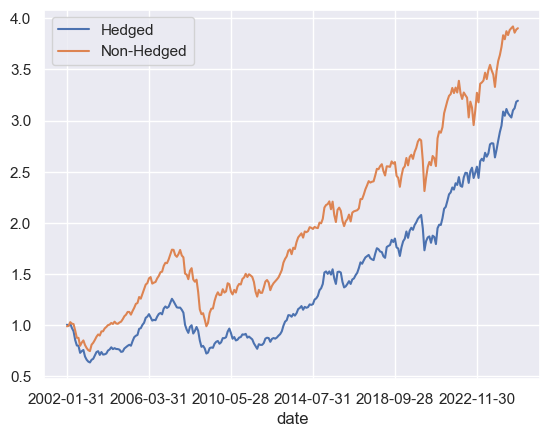

In [17]:
import matplotlib.pyplot as plt

df_hedged_columns['cum_prod_equal_weight'].plot()
df_non_hedged_columns['cum_prod_equal_weight'].plot()

plt.legend(['Hedged', 'Non-Hedged'])
plt.show()

In [18]:
def compute_sharpe_ratio(series, rf):
    return (series - rf).mean() * np.sqrt(252) / series.std()

sr_ew_hedged = compute_sharpe_ratio(df_hedged_columns['equal_weight_ret'], df_hedged_columns['rf_US'])
sr_ew_non_hedged = compute_sharpe_ratio(df_non_hedged_columns['equal_weight_ret'], df_non_hedged_columns['rf_US'])

print(f'The SR of the EW non hedged startegy is : {sr_ew_non_hedged}')
print(f'The mean of the returns is : {df_non_hedged_columns["equal_weight_ret"].mean()}')
print(f'The standard deviation of the returns is : {df_non_hedged_columns["equal_weight_ret"].std()}')
print('--'*20)
print(f'The SR of the EW hedged startegy is : {sr_ew_hedged}')
print(f'The mean of the returns is : {df_hedged_columns["equal_weight_ret"].mean()}')
print(f'The standard deviation of the returns is : {df_hedged_columns["equal_weight_ret"].std()}')


The SR of the EW non hedged startegy is : 2.0702979351354274
The mean of the returns is : 0.00547250304588656
The standard deviation of the returns is : 0.032337103786838
----------------------------------------
The SR of the EW hedged startegy is : 1.6835165801849172
The mean of the returns is : 0.004769397543864287
The standard deviation of the returns is : 0.03313658209963708


### **2.** Risk parity ( without indication doing the unlevered version )

In [19]:
df_rp_hedged = df_hedged_columns.copy()
df_rp_non_hedged = df_non_hedged_columns.copy()

In [20]:
index_columns = [col for col in df_rp_non_hedged.columns if col.startswith('mportret_')]

for col in index_columns:
    df_rp_hedged.loc[:,f'rolling_std_{col}_hedged'] = df_rp_hedged.loc[:,col + '_hedged'].rolling(window=60).std()
    df_rp_non_hedged.loc[:,f'rolling_std_{col}'] = df_rp_non_hedged.loc[:,col].rolling(window=60).std()

df_rp_hedged.dropna(inplace=True)
df_rp_non_hedged.dropna(inplace=True)

In [21]:
df_rp_hedged.head()

mportret_AUS_us_adjusted_hedged  mportret_CHE_us_adjusted_hedged  \
date                                                                           
2007-03-30                        -0.008156                         0.031233   
2007-04-30                         0.031212                         0.068524   
2007-05-31                         0.007620                         0.024094   
2007-06-29                        -0.031122                        -0.043104   
2007-07-31                         0.026833                        -0.036222   

            mportret_DEU_us_adjusted_hedged  mportret_FRA_us_adjusted_hedged  \
date                                                                           
2007-03-30                         0.014912                         0.013287   
2007-04-30                         0.054005                         0.047156   
2007-05-31                         0.058572                         0.050629   
2007-06-29                        -0.015739                        -0.017191   
2007-07-31                        -0.029993                        -0.037808   

            mportret_UK_us_adjusted_hedged  mportret_JPN_us_adjusted_hedged  \
date                                                                          
2007-03-30                        0.011593                         0.002682   
2007-04-30                        0.024444                         0.009197   
2007-05-31                        0.023562                         0.046318   
2007-06-29                       -0.037618                         0.003382   
2007-07-31                       -0.023122                        -0.078114   

               rf_US  equal_weight_ret  cum_prod_equal_weight  \
date                                                            
2007-03-30  0.004209          0.009966               1.180797   
2007-04-30  0.003962          0.034071               1.221028   
2007-05-31  0.003912          0.030672               1.258480   
2007-06-29  0.003776         -0.019659               1.233739   
2007-07-31  0.004255         -0.024882               1.203041   

            rolling_std_mportret_AUS_us_adjusted_hedged  \
date                                                      
2007-03-30                                     0.030082   
2007-04-30                                     0.029619   
2007-05-31                                     0.029122   
2007-06-29                                     0.029483   
2007-07-31                                     0.029470   

            rolling_std_mportret_CHE_us_adjusted_hedged  \
date                                                      
2007-03-30                                     0.049904   
2007-04-30                                     0.050157   
2007-05-31                                     0.050004   
2007-06-29                                     0.047081   
2007-07-31                                     0.044730   

            rolling_std_mportret_DEU_us_adjusted_hedged  \
date                                                      
2007-03-30                                     0.058368   
2007-04-30                                     0.057700   
2007-05-31                                     0.057295   
2007-06-29                                     0.055258   
2007-07-31                                     0.053903   

            rolling_std_mportret_FRA_us_adjusted_hedged  \
date                                                      
2007-03-30                                     0.050954   
2007-04-30                                     0.050129   
2007-05-31                                     0.049490   
2007-06-29                                     0.046584   
2007-07-31                                     0.045278   

            rolling_std_mportret_UK_us_adjusted_hedged  \
date                                                     
2007-03-30                                    0.041807   
2007-04-30                                    0.04

In [22]:
rolling_std_columns = [col for col in df_rp_non_hedged.columns if col.startswith('rolling_std')]

for col in rolling_std_columns:

    df_rp_hedged[f'weight_{col}_hedged'] = 1 / df_rp_hedged[col+'_hedged']
    df_rp_non_hedged[f'weight_{col}'] = 1 / df_rp_non_hedged[col]

df_rp_non_hedged.head()

mportret_AUS_us_adjusted  mportret_CHE_us_adjusted  \
date                                                             
2006-12-29                  0.037821                  0.045508   
2007-01-31                  0.019189                  0.041853   
2007-02-28                  0.017537                 -0.033953   
2007-03-30                  0.036214                  0.033286   
2007-04-30                  0.030340                  0.059277   

            mportret_DEU_us_adjusted  mportret_FRA_us_adjusted  \
date                                                             
2006-12-29                  0.046910                  0.043964   
2007-01-31                  0.034374                  0.010940   
2007-02-28                 -0.006937                 -0.010474   
2007-03-30                  0.034168                  0.032542   
2007-04-30                  0.053727                  0.046878   

            mportret_UK_us_adjusted  mportret_JPN_us_adjusted     rf_US  \
date                                                                      
2006-12-29                 0.033906                  0.046555  0.003974   
2007-01-31                -0.001682                  0.024286  0.004167   
2007-02-28                -0.001668                  0.016566  0.004286   
2007-03-30                 0.032901                 -0.015046  0.004209   
2007-04-30                 0.023319                 -0.009474  0.003962   

            equal_weight_ret  cum_prod_equal_weight  \
date                                                  
2006-12-29          0.036948               1.579911   
2007-01-31          0.019018               1.609958   
2007-02-28         -0.002092               1.606590   
2007-03-30          0.022611               1.642916   
2007-04-30          0.029719               1.691742   

            rolling_std_mportret_AUS_us_adjusted  \
date                                               
2006-12-29                              0.025890   
2007-01-31                              0.025836   
2007-02-28                              0.025772   
2007-03-30                              0.025923   
2007-04-30                              0.025742   

            rolling_std_mportret_CHE_us_adjusted  \
date                                               
2006-12-29                              0.041926   
2007-01-31                              0.041961   
2007-02-28                              0.042327   
2007-03-30                              0.042114   
2007-04-30                              0.042592   

            rolling_std_mportret_DEU_us_adjusted  \
date                                               
2006-12-29                              0.054846   
2007-01-31                              0.054948   
2007-02-28                              0.054938   
2007-03-30                              0.054776   
2007-04-30                              0.054598   

            rolling_std_mportret_FRA_us_adjusted  \
date                                               
2006-12-29                              0.045962   
2007-01-31                              0.045740   
2007-02-28                              0.045775   
2007-03-30                              0.045518   
2007-04-30                              0.045240   

            rolling_std_mportret_UK_us_adjusted  \
date                                              
2006-12-29                             0.037151   
2007-01-31                             0.037094   
2007-02-28                             0.037086   
2007-03-30                             0.037000   
2007-04-30                             0.036949   

            rolling_std_mportret_JPN_us_adjusted  \
date                                               
2006-12-29                              0.043454   
2007-01-31                              0.042599   
2007-02-28                              0.042404   
2007-03-30                              0.042172   
2007-04-30                              0.04

In [23]:
weight_columns_non_hedged = [col for col in df_rp_non_hedged.columns if col.startswith('weight')]
weight_columns_hedged = [col for col in df_rp_hedged.columns if col.startswith('weight')]

weights_strat_non_hedged = []
weights_strat_hedged = []

for col in weight_columns_non_hedged:
    df_rp_non_hedged[f'standardized_{col}'] = df_rp_non_hedged[col] / df_rp_non_hedged[weight_columns_non_hedged].sum(axis=1)
    weights_strat_non_hedged.append(f'standardized_{col}')

for col in weight_columns_hedged:
    df_rp_hedged[f'standardized_{col}'] = df_rp_hedged[col] / df_rp_hedged[weight_columns_hedged].sum(axis=1)
    weights_strat_hedged.append(f'standardized_{col}')

df_rp_hedged.head()

mportret_AUS_us_adjusted_hedged  mportret_CHE_us_adjusted_hedged  \
date                                                                           
2007-03-30                        -0.008156                         0.031233   
2007-04-30                         0.031212                         0.068524   
2007-05-31                         0.007620                         0.024094   
2007-06-29                        -0.031122                        -0.043104   
2007-07-31                         0.026833                        -0.036222   

            mportret_DEU_us_adjusted_hedged  mportret_FRA_us_adjusted_hedged  \
date                                                                           
2007-03-30                         0.014912                         0.013287   
2007-04-30                         0.054005                         0.047156   
2007-05-31                         0.058572                         0.050629   
2007-06-29                        -0.015739                        -0.017191   
2007-07-31                        -0.029993                        -0.037808   

            mportret_UK_us_adjusted_hedged  mportret_JPN_us_adjusted_hedged  \
date                                                                          
2007-03-30                        0.011593                         0.002682   
2007-04-30                        0.024444                         0.009197   
2007-05-31                        0.023562                         0.046318   
2007-06-29                       -0.037618                         0.003382   
2007-07-31                       -0.023122                        -0.078114   

               rf_US  equal_weight_ret  cum_prod_equal_weight  \
date                                                            
2007-03-30  0.004209          0.009966               1.180797   
2007-04-30  0.003962          0.034071               1.221028   
2007-05-31  0.003912          0.030672               1.258480   
2007-06-29  0.003776         -0.019659               1.233739   
2007-07-31  0.004255         -0.024882               1.203041   

            rolling_std_mportret_AUS_us_adjusted_hedged  \
date                                                      
2007-03-30                                     0.030082   
2007-04-30                                     0.029619   
2007-05-31                                     0.029122   
2007-06-29                                     0.029483   
2007-07-31                                     0.029470   

            rolling_std_mportret_CHE_us_adjusted_hedged  \
date                                                      
2007-03-30                                     0.049904   
2007-04-30                                     0.050157   
2007-05-31                                     0.050004   
2007-06-29                                     0.047081   
2007-07-31                                     0.044730   

            rolling_std_mportret_DEU_us_adjusted_hedged  \
date                                                      
2007-03-30                                     0.058368   
2007-04-30                                     0.057700   
2007-05-31                                     0.057295   
2007-06-29                                     0.055258   
2007-07-31                                     0.053903   

            rolling_std_mportret_FRA_us_adjusted_hedged  \
date                                                      
2007-03-30                                     0.050954   
2007-04-30                                     0.050129   
2007-05-31                                     0.049490   
2007-06-29                                     0.046584   
2007-07-31                                     0.045278   

            rolling_std_mportret_UK_us_adjusted_hedged  \
date                                                     
2007-03-30                                    0.041807   
2007-04-30                                    0.04

In [24]:
ret_columns_hedged = [col for col in df_rp_hedged.columns if col.startswith('mportret_')]
ret_columns_non_hedged = [col for col in df_rp_non_hedged.columns if col.startswith('mportret_')]

for x, y in zip(ret_columns_hedged, weights_strat_hedged):
    df_rp_hedged[f'strat_{x}'] = df_rp_hedged[x] * df_rp_hedged[y].shift(1)

for x, y in zip(ret_columns_non_hedged, weights_strat_non_hedged):
    df_rp_non_hedged[f'strat_{x}'] = df_rp_non_hedged[x] * df_rp_non_hedged[y].shift(1)

In [25]:
strat_col_hedged = [col for col in df_rp_hedged.columns if col.startswith('strat_')]
strat_col_non_hedged = [col for col in df_rp_non_hedged.columns if col.startswith('strat_')]

df_rp_hedged['rp_return'] = df_rp_hedged[strat_col_hedged].sum(axis=1)
df_rp_non_hedged['rp_return'] = df_rp_non_hedged[strat_col_non_hedged].sum(axis=1)

df_rp_hedged.head()

mportret_AUS_us_adjusted_hedged  mportret_CHE_us_adjusted_hedged  \
date                                                                           
2007-03-30                        -0.008156                         0.031233   
2007-04-30                         0.031212                         0.068524   
2007-05-31                         0.007620                         0.024094   
2007-06-29                        -0.031122                        -0.043104   
2007-07-31                         0.026833                        -0.036222   

            mportret_DEU_us_adjusted_hedged  mportret_FRA_us_adjusted_hedged  \
date                                                                           
2007-03-30                         0.014912                         0.013287   
2007-04-30                         0.054005                         0.047156   
2007-05-31                         0.058572                         0.050629   
2007-06-29                        -0.015739                        -0.017191   
2007-07-31                        -0.029993                        -0.037808   

            mportret_UK_us_adjusted_hedged  mportret_JPN_us_adjusted_hedged  \
date                                                                          
2007-03-30                        0.011593                         0.002682   
2007-04-30                        0.024444                         0.009197   
2007-05-31                        0.023562                         0.046318   
2007-06-29                       -0.037618                         0.003382   
2007-07-31                       -0.023122                        -0.078114   

               rf_US  equal_weight_ret  cum_prod_equal_weight  \
date                                                            
2007-03-30  0.004209          0.009966               1.180797   
2007-04-30  0.003962          0.034071               1.221028   
2007-05-31  0.003912          0.030672               1.258480   
2007-06-29  0.003776         -0.019659               1.233739   
2007-07-31  0.004255         -0.024882               1.203041   

            rolling_std_mportret_AUS_us_adjusted_hedged  \
date                                                      
2007-03-30                                     0.030082   
2007-04-30                                     0.029619   
2007-05-31                                     0.029122   
2007-06-29                                     0.029483   
2007-07-31                                     0.029470   

            rolling_std_mportret_CHE_us_adjusted_hedged  \
date                                                      
2007-03-30                                     0.049904   
2007-04-30                                     0.050157   
2007-05-31                                     0.050004   
2007-06-29                                     0.047081   
2007-07-31                                     0.044730   

            rolling_std_mportret_DEU_us_adjusted_hedged  \
date                                                      
2007-03-30                                     0.058368   
2007-04-30                                     0.057700   
2007-05-31                                     0.057295   
2007-06-29                                     0.055258   
2007-07-31                                     0.053903   

            rolling_std_mportret_FRA_us_adjusted_hedged  \
date                                                      
2007-03-30                                     0.050954   
2007-04-30                                     0.050129   
2007-05-31                                     0.049490   
2007-06-29                                     0.046584   
2007-07-31                                     0.045278   

            rolling_std_mportret_UK_us_adjusted_hedged  \
date                                                     
2007-03-30                                    0.041807   
2007-04-30                                    0.04

In [26]:
df_rp_hedged['cumprod_rp_return'] = (1 + df_rp_hedged['rp_return']).cumprod()
df_rp_non_hedged['cumprod_rp_return'] = (1 + df_rp_non_hedged['rp_return']).cumprod()

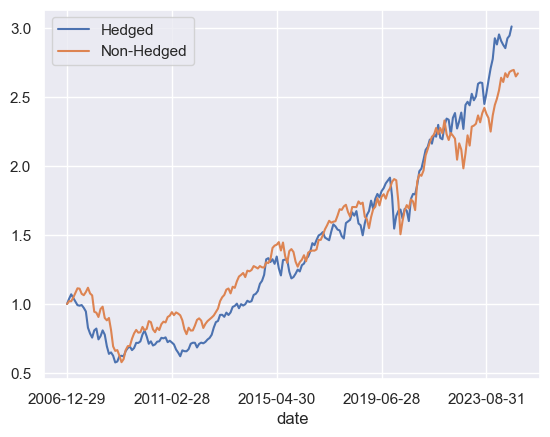

In [27]:
df_rp_hedged['cumprod_rp_return'].plot()
df_rp_non_hedged['cumprod_rp_return'].plot()

plt.legend(['Hedged', 'Non-Hedged'])
plt.show()

In [28]:
sr_rp_hedged = compute_sharpe_ratio(df_rp_hedged['rp_return'], df_rp_hedged['rf_US'])
sr_rp_non_hedged = compute_sharpe_ratio(df_rp_non_hedged['rp_return'], df_rp_non_hedged['rf_US'])

print(f'The sharpe ratio of the hedged RP strategy is : {sr_rp_hedged}')
print(f'The mean of returns is : {df_rp_hedged["rp_return"].mean()}')
print(f'The std of returns is : {df_rp_hedged["rp_return"].std()}')
print('--'*20)
print(f'The sharpe ratio of the non hedged RP strategy is : {sr_rp_non_hedged}')
print(f'The mean of returns is : {df_rp_non_hedged["rp_return"].mean()}')
print(f'The std of returns is : {df_rp_non_hedged["rp_return"].std()}')


The sharpe ratio of the hedged RP strategy is : 2.0552574914326627
The mean of returns is : 0.005901936331263119
The std of returns is : 0.03768490147585965
----------------------------------------
The sharpe ratio of the non hedged RP strategy is : 1.767171551085704
The mean of returns is : 0.005282019588148779
The std of returns is : 0.03787043016486626


In [31]:
df_rp_hedged['rp_return'].to_csv('returns_rp_hedged.csv')
df_rp_non_hedged['rp_return'].to_csv('returns_rp_non_hedged.csv')

### **3.** Now the mean variance framework

In [32]:
non_hedged_mv_columns = [col for col in df.columns if col.startswith('mportret_') and 'us_adjusted' in col and not col.endswith('_hedged')] + ['rf_US']
hedged_mv_columns = [col for col in df.columns if col.endswith('_hedged')] + ['rf_US']

print(f'Non-hedged columns: {non_hedged_mv_columns}')
print(f'Hedged columns: {hedged_mv_columns}')

Non-hedged columns: ['mportret_AUS_us_adjusted', 'mportret_CHE_us_adjusted', 'mportret_DEU_us_adjusted', 'mportret_FRA_us_adjusted', 'mportret_UK_us_adjusted', 'mportret_JPN_us_adjusted', 'rf_US']
Hedged columns: ['mportret_AUS_us_adjusted_hedged', 'mportret_CHE_us_adjusted_hedged', 'mportret_DEU_us_adjusted_hedged', 'mportret_FRA_us_adjusted_hedged', 'mportret_UK_us_adjusted_hedged', 'mportret_JPN_us_adjusted_hedged', 'rf_US']


In [33]:
df_mv_non_hedged = df[non_hedged_mv_columns].copy()
df_mv_hedged = df[hedged_mv_columns].copy()

df_mv_hedged.head()

mportret_AUS_us_adjusted_hedged  mportret_CHE_us_adjusted_hedged  \
date                                                                           
2002-01-31                         0.033146                        -0.006314   
2002-02-28                        -0.029076                        -0.001618   
2002-03-28                        -0.015331                         0.037273   
2002-04-30                        -0.044440                        -0.045182   
2002-05-31                        -0.036438                        -0.028356   

            mportret_DEU_us_adjusted_hedged  mportret_FRA_us_adjusted_hedged  \
date                                                                           
2002-01-31                         0.024922                        -0.013903   
2002-02-28                        -0.017016                        -0.012573   
2002-03-28                         0.037703                         0.040485   
2002-04-30                        -0.083073                        -0.081993   
2002-05-31                        -0.071042                        -0.073454   

            mportret_UK_us_adjusted_hedged  mportret_JPN_us_adjusted_hedged  \
date                                                                          
2002-01-31                       -0.006103                              NaN   
2002-02-28                       -0.005486                              NaN   
2002-03-28                        0.023425                              NaN   
2002-04-30                       -0.027289                        -0.012115   
2002-05-31                       -0.030153                         0.013209   

               rf_US  
date                  
2002-01-31  0.001408  
2002-02-28  0.001444  
2002-03-28  0.001425  
2002-04-30  0.001461  
2002-05-31  0.001408

In [34]:
import pandas as pd
import numpy as np

def compute_rolling_mean_variance(df, window=60):
    # Separate stock returns and risk-free rate
    rf = df['rf_US']
    stock_returns = df.drop(columns='rf_US')
    
    # Compute excess returns
    excess_returns = stock_returns.sub(rf, axis=0)

    # Prepare output containers
    rolling_means = []
    rolling_covs = []
    rolling_dates = []

    # Loop through rolling windows
    for i in range(window, len(excess_returns)):
        window_data = excess_returns.iloc[i - window:i]
        mean_vector = window_data.mean()
        cov_matrix = window_data.cov()

        rolling_means.append(mean_vector)
        rolling_covs.append(cov_matrix)
        rolling_dates.append(excess_returns.index[i])

    # Convert lists to pandas objects
    mean_df = pd.DataFrame(rolling_means, index=rolling_dates)
    cov_df = {date: cov for date, cov in zip(rolling_dates, rolling_covs)}

    return mean_df, cov_df


In [35]:
mean_hedged, cov_hedged = compute_rolling_mean_variance(df_mv_hedged)
mean_non_hedged, cov_non_hedged = compute_rolling_mean_variance(df_mv_non_hedged)

mean_hedged.head()

mportret_AUS_us_adjusted_hedged  mportret_CHE_us_adjusted_hedged  \
2007-01-31                         0.001181                         0.002303   
2007-02-28                         0.000874                         0.003049   
2007-03-30                         0.001368                         0.002210   
2007-04-30                         0.001441                         0.002063   
2007-05-31                         0.002660                         0.003917   

            mportret_DEU_us_adjusted_hedged  mportret_FRA_us_adjusted_hedged  \
2007-01-31                        -0.000588                        -0.001107   
2007-02-28                        -0.000571                        -0.000834   
2007-03-30                        -0.000644                        -0.001040   
2007-04-30                        -0.001070                        -0.001540   
2007-05-31                         0.001173                         0.000571   

            mportret_UK_us_adjusted_hedged  mportret_JPN_us_adjusted_hedged  
2007-01-31                       -0.001605                         0.008372  
2007-02-28                       -0.001586                         0.008647  
2007-03-30                       -0.001477                         0.008303  
2007-04-30                       -0.001721                         0.008139  
2007-05-31                       -0.000900                         0.008452

In [37]:
import cvxpy as cp

def compute_mv_optimal_weights(mean_df, cov_dict):
    weights_list = []
    dates = mean_df.index
    tickers = [f'weight_{col}' for col in mean_df.columns]

    for date in dates:
        mu = mean_df.loc[date].values          # Expected returns vector
        cov = cov_dict[date].values            # Covariance matrix
        n = len(mu)                            # Number of assets

        # Optimization variables
        w = cp.Variable(n)

        # Objective: minimize portfolio variance (w.T @ Σ @ w)
        portfolio_variance = cp.quad_form(w, cov)
        objective = cp.Minimize(portfolio_variance)

        # Constraints: fully invested, no short selling
        constraints = [
            cp.sum(w) == 1,
            w >= 0
        ]

        # Solve optimization
        problem = cp.Problem(objective, constraints)
        problem.solve()

        # Store result
        weights_list.append(pd.Series(w.value, index=tickers, name=date))

    # Combine all weights into a DataFrame
    weights_df = pd.DataFrame(weights_list)
    return weights_df


In [38]:
df_hedged_mv_weights = compute_mv_optimal_weights(mean_hedged, cov_hedged)
df_non_hedged_mv_weights = compute_mv_optimal_weights(mean_non_hedged, cov_non_hedged)

df_mv_hedged = pd.merge(df_mv_hedged.reset_index().rename(columns={'date':'index'}), df_hedged_mv_weights.shift(1).reset_index(), on='index', how='left').dropna()
df_mv_hedged = df_mv_hedged.set_index('index')

df_mv_non_hedged = pd.merge(df_mv_non_hedged.reset_index().rename(columns={'date':'index'}), df_non_hedged_mv_weights.shift(1).reset_index(), on='index', how='left').dropna()
df_mv_non_hedged = df_mv_non_hedged.set_index('index')

df_mv_hedged.head()

mportret_AUS_us_adjusted_hedged  mportret_CHE_us_adjusted_hedged  \
index                                                                          
2007-02-28                         0.003419                        -0.049112   
2007-03-30                        -0.008156                         0.031233   
2007-04-30                         0.031212                         0.068524   
2007-05-31                         0.007620                         0.024094   
2007-06-29                        -0.031122                        -0.043104   

            mportret_DEU_us_adjusted_hedged  mportret_FRA_us_adjusted_hedged  \
index                                                                          
2007-02-28                        -0.018565                        -0.022102   
2007-03-30                         0.014912                         0.013287   
2007-04-30                         0.054005                         0.047156   
2007-05-31                         0.058572                         0.050629   
2007-06-29                        -0.015739                        -0.017191   

            mportret_UK_us_adjusted_hedged  mportret_JPN_us_adjusted_hedged  \
index                                                                         
2007-02-28                        0.003878                        -0.007384   
2007-03-30                        0.011593                         0.002682   
2007-04-30                        0.024444                         0.009197   
2007-05-31                        0.023562                         0.046318   
2007-06-29                       -0.037618                         0.003382   

               rf_US  weight_mportret_AUS_us_adjusted_hedged  \
index                                                          
2007-02-28  0.004286                                0.803044   
2007-03-30  0.004209                                0.811989   
2007-04-30  0.003962                                0.820861   
2007-05-31  0.003912                                0.822344   
2007-06-29  0.003776                                0.833635   

            weight_mportret_CHE_us_adjusted_hedged  \
index                                                
2007-02-28                            1.026759e-19   
2007-03-30                            1.040461e-19   
2007-04-30                            1.074572e-19   
2007-05-31                            1.175758e-19   
2007-06-29                            1.232624e-19   

            weight_mportret_DEU_us_adjusted_hedged  \
index                                                
2007-02-28                            1.429932e-19   
2007-03-30                            1.534270e-19   
2007-04-30                            1.615218e-19   
2007-05-31                            1.262072e-19   
2007-06-29                            1.399203e-19   

            weight_mportret_FRA_us_adjusted_hedged  \
index                                                
2007-02-28                            1.196906e-19   
2007-03-30                            1.240433e-19   
2007-04-30                            1.298905e-19   
2007-05-31                            9.798916e-20   
2007-06-29                            1.101127e-19   

            weight_mportret_UK_us_adjusted_hedged  \
index                                               
2007-02-28                               0.196956   
2007-03-30                               0.188011   
2007-04-30                               0.179139   
2007-05-31                               0.175033   
2007-06-29                               0.164757   

            weight_mportret_JPN_us_adjusted_hedged  
index                                               
2007-02-28                           -4.602584e-21  
2007-03-30                           -9.559131e-21  
2007-04-30                           -1.448699e-20  
2007-05-31                            2.622904e-03  
2007-06-29                            1.608142e-03

In [39]:
hedged_mv_columns = [col for col in hedged_mv_columns if col.startswith('mportret_')]
non_hedged_mv_columns = [col for col in non_hedged_mv_columns if col.startswith('mportret_')]

df_mv_hedged['mv_return'] = df_mv_hedged[hedged_mv_columns].mul(df_mv_hedged[[f'weight_{col}' for col in hedged_mv_columns]].values).sum(axis=1)
df_mv_non_hedged['mv_return'] = df_mv_non_hedged[non_hedged_mv_columns].mul(df_mv_non_hedged[[f'weight_{col}' for col in non_hedged_mv_columns]].values).sum(axis=1)

df_mv_hedged.head()

mportret_AUS_us_adjusted_hedged  mportret_CHE_us_adjusted_hedged  \
index                                                                          
2007-02-28                         0.003419                        -0.049112   
2007-03-30                        -0.008156                         0.031233   
2007-04-30                         0.031212                         0.068524   
2007-05-31                         0.007620                         0.024094   
2007-06-29                        -0.031122                        -0.043104   

            mportret_DEU_us_adjusted_hedged  mportret_FRA_us_adjusted_hedged  \
index                                                                          
2007-02-28                        -0.018565                        -0.022102   
2007-03-30                         0.014912                         0.013287   
2007-04-30                         0.054005                         0.047156   
2007-05-31                         0.058572                         0.050629   
2007-06-29                        -0.015739                        -0.017191   

            mportret_UK_us_adjusted_hedged  mportret_JPN_us_adjusted_hedged  \
index                                                                         
2007-02-28                        0.003878                        -0.007384   
2007-03-30                        0.011593                         0.002682   
2007-04-30                        0.024444                         0.009197   
2007-05-31                        0.023562                         0.046318   
2007-06-29                       -0.037618                         0.003382   

               rf_US  weight_mportret_AUS_us_adjusted_hedged  \
index                                                          
2007-02-28  0.004286                                0.803044   
2007-03-30  0.004209                                0.811989   
2007-04-30  0.003962                                0.820861   
2007-05-31  0.003912                                0.822344   
2007-06-29  0.003776                                0.833635   

            weight_mportret_CHE_us_adjusted_hedged  \
index                                                
2007-02-28                            1.026759e-19   
2007-03-30                            1.040461e-19   
2007-04-30                            1.074572e-19   
2007-05-31                            1.175758e-19   
2007-06-29                            1.232624e-19   

            weight_mportret_DEU_us_adjusted_hedged  \
index                                                
2007-02-28                            1.429932e-19   
2007-03-30                            1.534270e-19   
2007-04-30                            1.615218e-19   
2007-05-31                            1.262072e-19   
2007-06-29                            1.399203e-19   

            weight_mportret_FRA_us_adjusted_hedged  \
index                                                
2007-02-28                            1.196906e-19   
2007-03-30                            1.240433e-19   
2007-04-30                            1.298905e-19   
2007-05-31                            9.798916e-20   
2007-06-29                            1.101127e-19   

            weight_mportret_UK_us_adjusted_hedged  \
index                                               
2007-02-28                               0.196956   
2007-03-30                               0.188011   
2007-04-30                               0.179139   
2007-05-31                               0.175033   
2007-06-29                               0.164757   

            weight_mportret_JPN_us_adjusted_hedged  mv_return  
index                                                          
2007-02-28                           -4.602584e-21   0.003509  
2007-03-30                           -9.559131e-21  -0.004443  
2007-04-30                           -1.448699e-20   0.029999  
2007-05-31                            2.622904e-03   0.010

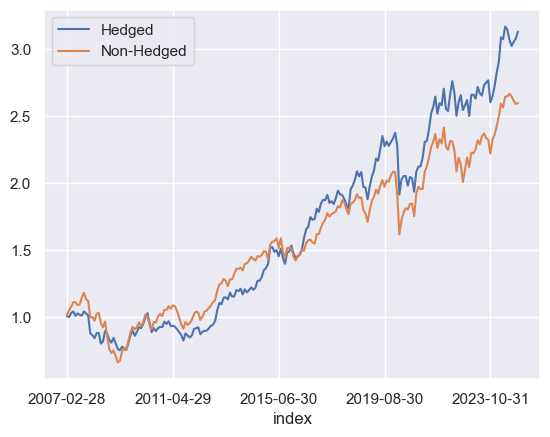

In [40]:
df_mv_hedged['cumprod_mv_return'] = (1 + df_mv_hedged['mv_return']).cumprod()
df_mv_non_hedged['cumprod_mv_return'] = (1 + df_mv_non_hedged['mv_return']).cumprod()

df_mv_hedged['cumprod_mv_return'].plot()
df_mv_non_hedged['cumprod_mv_return'].plot()
plt.legend(['Hedged', 'Non-Hedged'])
plt.show()

In [41]:
sharpe_mv_hedged = compute_sharpe_ratio(df_mv_hedged['mv_return'], df_mv_hedged['rf_US'])
sharpe_mv_non_hedged = compute_sharpe_ratio(df_mv_non_hedged['mv_return'], df_mv_non_hedged['rf_US'])

print(f'The Sharpe ratio of the hedged MV strategy is : {sharpe_mv_hedged}')
print(f'The mean of returns is : {df_mv_hedged["mv_return"].mean()}')
print(f'The std of returns is : {df_mv_hedged["mv_return"].std()}')
print('--'*20)
print(f'The Sharpe ratio of the non hedged MV strategy is : {sharpe_mv_non_hedged}')
print(f'The mean of returns is : {df_mv_non_hedged["mv_return"].mean()}')
print(f'The std of returns is : {df_mv_non_hedged["mv_return"].std()}')

The Sharpe ratio of the hedged MV strategy is : 2.1643821197616644
The mean of returns is : 0.006024456927613119
The std of returns is : 0.0365716696996432
----------------------------------------
The Sharpe ratio of the non hedged MV strategy is : 1.761411140333383
The mean of returns is : 0.005175111903731181
The std of returns is : 0.03728381876386704


## 4 Equity Index Momentum Strategy (MOM)

(a) 
Construct the return to a long-short momentum strategy portfolio. To that effect every month sort currency hedged stock indexes based on their 1-month lagged 11-month return (that is in month trank stocks based on their t− 12 to t− 1 cumulative return). Call Rankit the corresponding rank of index i at time t (e.g., Rankit = 2 if country i has the second lowest Currency-hedged return over the last year.)
Then compute monthly returns to a portfolio that invests in index i the weight
  wit = Z(Ranki−(N + 1)/2 )
for all i= 1,...,N, and where N is the total number of stock indexes traded and Z is a factor that insures that the the sum of the long positions is +$1 and the sum of the short positons is−$1.

In [54]:
# Load the dataset and set 'date' as the index
df = pd.read_csv("merged_all_data.csv", parse_dates=['date'])
df.set_index('date', inplace=True)

# Define the list of countries and prefix for currency-hedged returns
countries = ['AUSTRALIA', 'SWITZERLAND', 'GERMANY', 'FRANCE', 'UNITED KINGDOM', 'JAPAN']
prefix = 'mportretx_'  # monthly portfolio returns, currency-hedged

# Create a DataFrame to store momentum signals
momentum = pd.DataFrame(index=df.index)

# Compute past 11-month cumulative log-returns for each country
for country in countries:
    col = prefix + country
    log_ret = np.log(1 + df[col])
    momentum[country] = log_ret.rolling(window=11, min_periods=11).sum().shift(1)  # t−12 to t−1 returns

# Rank countries each month based on their momentum
ranks = momentum.rank(axis=1, method='first')

# Compute ranking weights for the long-short portfolio
N = len(countries)
Z = 8/N**2

weights = (ranks - (N + 1) / 2) * Z  # assigns positive weights to winners, negative to losers
# Extract return data and rename columns
returns = df[[prefix + c for c in countries]].copy()
returns.columns = countries

# Compute the return of the momentum strategy
MOM_return = (weights * returns).sum(axis=1)

MOM_return[weights.isnull().any(axis=1)] = np.nan

(b) Compute and compare the mean, standard deviation, and Sharpe ratios of the long
and short legs of the strategy as well as of the strategy itself. Test if the strategy has
an average return that is statistically significantly different from zero.

In [55]:
# Define long and short positions based on ranks
# Long: top 3 countries by momentum
# Short: bottom 3 countries by momentum
long_mask = ranks.apply(lambda row: row >= (N - 3 + 1), axis=1)
short_mask = ranks.apply(lambda row: row <= 3, axis=1)

# Compute average return of long and short legs
long_returns = (returns * long_mask).sum(axis=1) / long_mask.sum(axis=1)
short_returns = (returns * short_mask).sum(axis=1) / short_mask.sum(axis=1)

# Momentum strategy return (already computed before)
strategy_returns = MOM_return

import pandas as pd
import numpy as np
from scipy import stats

# Create a DataFrame to summarize mean, standard deviation, and Sharpe ratio
results = pd.DataFrame({
    "Mean": [long_returns.mean(), short_returns.mean(), strategy_returns.mean()],
    "Std": [long_returns.std(), short_returns.std(), strategy_returns.std()],
    "Sharpe": [
        long_returns.mean() / long_returns.std(),
        short_returns.mean() / short_returns.std(),
        strategy_returns.mean() / strategy_returns.std()
    ]
}, index=["Long", "Short", "Strategy"])

# Perform t-test to check if strategy return is significantly different from 0
t_stat, p_value = stats.ttest_1samp(strategy_returns.dropna(), popmean=0)
results["t-stat"] = [np.nan, np.nan, t_stat]
results["p-value"] = [np.nan, np.nan, p_value]

# Display result rounded to 4 decimal places
print(results.round(4))

            Mean     Std  Sharpe  t-stat  p-value
Long      0.0034  0.0382  0.0892     NaN      NaN
Short     0.0053  0.0384  0.1372     NaN      NaN
Strategy -0.0024  0.0246 -0.0985 -1.6028   0.1102


(c) Regress the MOM strategy return on the DIV return. Interpret the regression results.
In particular, do you think that it is interesting for a DIV-investor to also invest in the
MOM strategy?

In [56]:
import statsmodels.api as sm

# Load the data of DIV strategy and set 'date' as the index
DIV_return = pd.read_csv("returns_rp_hedged.csv", parse_dates=['date'])
DIV_return.set_index('date', inplace=True)

import pandas as pd
import statsmodels.api as sm

# 1. Align the data based on the common time frame (intersection of both time series)
returns_df = pd.concat([MOM_return, DIV_return], axis=1, join='inner')
returns_df.columns = ['MOM', 'DIV']

# 2. Drop missing values to avoid bias in regression
returns_df = returns_df.dropna()

# 3. Set up the regression model: regress MOM returns on DIV returns
X = sm.add_constant(returns_df['DIV'])  # add intercept (constant term α)
y = returns_df['MOM']
model = sm.OLS(y, X).fit()

# 4. Display the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MOM   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04319
Date:                Sat, 14 Jun 2025   Prob (F-statistic):              0.836
Time:                        16:18:46   Log-Likelihood:                 487.73
No. Observations:                 213   AIC:                            -971.5
Df Residuals:                     211   BIC:                            -964.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0022      0.002     -1.294      0.1

## 5 Equity Index Long Term Reversal strategy (REV)


(a) 
Construct the return to a long-short reversal strategy portfolio. To that effect every month sort currency hedged stock indexes based on their 12-month lagged 5-year past return (that is in month t rank stocks based on their t−60 to t−12 cumulative return). Call Rankit the corresponding rank of index i at time t.
Then compute monthly returns to a portfolio that invests in index i the weight: wit = Z ((N + 1)/2 − Ranki) for all i = 1, . . . , N, and where N is the total number of stock indexes traded and Z is a factor that insures that the the sum of the long positions is +$1 and the sum of the short positons is −$1.

In [57]:
# Load the dataset and set 'date' as the index
df = pd.read_csv("merged_all_data.csv", parse_dates=['date'])
df.set_index('date', inplace=True)

# Define the list of countries and prefix for currency-hedged returns
countries = ['AUSTRALIA', 'SWITZERLAND', 'GERMANY', 'FRANCE', 'UNITED KINGDOM', 'JAPAN']
prefix = 'mportretx_'  # monthly portfolio returns

# Create a DataFrame for long-term reversal signals
rev_signal = pd.DataFrame(index=df.index)

# Compute past t−60 to t−12 cumulative log-returns
for country in countries:
    col = prefix + country
    log_ret = np.log(1 + df[col])
    rev_signal[country] = log_ret.rolling(window=49, min_periods=49).sum().shift(12)  # t−60 to t−12 returns

# Rank countries each month based on reversal signal
rev_ranks = rev_signal.rank(axis=1, method='first')

# Compute ranking weights for the long-short reversal portfolio
N = len(countries)
Z = 8/N/N
rev_weights = ((N + 1)/2 - rev_ranks) * Z  # reversal: long past losers, short past winners
print(rev_weights)
# Extract returns8^1
returns = df[[prefix + c for c in countries]].copy()
returns.columns = countries

# Compute REV strategy return
REV_return = (rev_weights * returns).sum(axis=1)

REV_return[rev_weights.isnull().any(axis=1)] = np.nan


            AUSTRALIA  SWITZERLAND   GERMANY    FRANCE  UNITED KINGDOM  \
date                                                                     
2002-01-31        NaN          NaN       NaN       NaN             NaN   
2002-02-28        NaN          NaN       NaN       NaN             NaN   
2002-03-28        NaN          NaN       NaN       NaN             NaN   
2002-04-30        NaN          NaN       NaN       NaN             NaN   
2002-05-31        NaN          NaN       NaN       NaN             NaN   
...               ...          ...       ...       ...             ...   
2024-08-30   0.333333     0.111111 -0.111111 -0.333333        0.555556   
2024-09-30   0.333333     0.111111 -0.111111 -0.333333        0.555556   
2024-10-31   0.111111     0.333333 -0.111111 -0.333333        0.555556   
2024-11-29   0.111111     0.333333 -0.111111 -0.333333        0.555556   
2024-12-31  -0.111111     0.333333  0.111111 -0.333333        0.555556   

               JAPAN  
date          

In [58]:
print(REV_return.head(13))

date
2002-01-31   NaN
2002-02-28   NaN
2002-03-28   NaN
2002-04-30   NaN
2002-05-31   NaN
2002-06-28   NaN
2002-07-31   NaN
2002-08-30   NaN
2002-09-30   NaN
2002-10-31   NaN
2002-11-29   NaN
2002-12-31   NaN
2003-01-31   NaN
dtype: float64


(b) Compute and compare the mean, standard deviation, and Sharpe ratios of the long
and short legs of the strategy as well as of the strategy itself. Test if the strategy has
an average return that is statistically significantly different from zero.

In [59]:
# Define long and short positions based on ranks
long_mask_rev = rev_ranks.apply(lambda row: row <= 3, axis=1)
short_mask_rev = rev_ranks.apply(lambda row: row >= (N -3 + 1), axis=1)

# Compute average return of long and short legs
long_returns_rev = (returns * long_mask_rev).sum(axis=1) / long_mask_rev.sum(axis=1)
short_returns_rev = (returns * short_mask_rev).sum(axis=1) / short_mask_rev.sum(axis=1)

# Summary statistics
rev_results = pd.DataFrame({
    "Mean": [long_returns_rev.mean(), short_returns_rev.mean(), REV_return.mean()],
    "Std": [long_returns_rev.std(), short_returns_rev.std(), REV_return.std()],
    "Sharpe": [
        long_returns_rev.mean() / long_returns_rev.std(),
        short_returns_rev.mean() / short_returns_rev.std(),
        REV_return.mean() / REV_return.std()
    ]
}, index=["Long", "Short", "Strategy"])

# T-test for significance
t_stat, p_value = stats.ttest_1samp(REV_return.dropna(), popmean=0)
rev_results["t-stat"] = [np.nan, np.nan, t_stat]
rev_results["p-value"] = [np.nan, np.nan, p_value]

# Display result rounded to 4 decimal places
print(rev_results.round(4))

            Mean     Std  Sharpe  t-stat  p-value
Long      0.0023  0.0393  0.0579     NaN      NaN
Short     0.0028  0.0398  0.0693     NaN      NaN
Strategy -0.0007  0.0229 -0.0311 -0.4574   0.6478


(c) Regress the REV strategy return on the DIV return. Interpret the regression results.
In particular, do you think that it is interesting for a DIV-investor to also invest in the
REV strategy?

In [60]:
import statsmodels.api as sm
import pandas as pd

# Load DIV strategy returns
DIV_return = pd.read_csv("returns_rp_hedged.csv", parse_dates=['date'])
DIV_return.set_index('date', inplace=True)

# Align common time frame 
returns_df = pd.concat([REV_return, DIV_return], axis=1, join='inner')
returns_df.columns = ['REV', 'DIV']

# Delete missing values
returns_df = returns_df.dropna()

# Regression
X = sm.add_constant(returns_df['DIV'])  # add intercept
y = returns_df['REV']
model = sm.OLS(y, X).fit()

# print
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    REV   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.875
Date:                Sat, 14 Jun 2025   Prob (F-statistic):              0.172
Time:                        16:19:56   Log-Likelihood:                 503.52
No. Observations:                 213   AIC:                            -1003.
Df Residuals:                     211   BIC:                            -996.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.288e-05      0.002     -0.046      0.9

## Part 6: Currency Carry Strategy Analysis

### (a) 1. Setup and Data Loading

In [63]:
pd.set_option('display.float_format', lambda x: f'{x:.10f}')

# Display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [64]:
# Load the dataset
df = pd.read_csv('merged_all_data.csv', index_col=0)

# Drop unnecessary columns (fic: Fama French Industry Classification, currency: currency denomination of stock prices)
df = df.drop(columns={col for col in df.columns if col.startswith(('fic', 'currency'))})

print("Original DataFrame head:")
df.head()

Original DataFrame head:


mportret_AUSTRALIA  mportretx_AUSTRALIA  mportret_SWITZERLAND  \
date                                                                        
2002-01-31        0.0273578567         0.0273132504         -0.0221262830   
2002-02-28       -0.0018319390        -0.0043578687          0.0116607107   
2002-03-28        0.0051988097        -0.0019141565          0.0487594286   
2002-04-30       -0.0143019767        -0.0154244722         -0.0041086009   
2002-05-31       -0.0002037861        -0.0017515748          0.0029628768   

            mportretx_SWITZERLAND  mportret_GERMANY  mportretx_GERMANY  \
date                                                                     
2002-01-31          -0.0221460495      0.0122772449       0.0114909316   
2002-02-28           0.0116456861     -0.0088072175      -0.0088160069   
2002-03-28           0.0455697800      0.0493281250       0.0484695259   
2002-04-30          -0.0079612276     -0.0450305093      -0.0470927763   
2002-05-31          -0.0006387405     -0.0257027573      -0.0330684684   

            mportret_FRANCE  mportretx_FRANCE  mportret_UNITED KINGDOM  \
date                                                                     
2002-01-31    -0.0271048471     -0.0273056737            -0.0108660983   
2002-02-28    -0.0043939683     -0.0044474921            -0.0033406566   
2002-03-28     0.0520810150      0.0519427042             0.0389300664   
2002-04-30    -0.0439877142     -0.0457546292            -0.0133618832   
2002-05-31    -0.0280161336     -0.0354866432            -0.0114824631   

            mportretx_UNITED KINGDOM  mportret_JAPAN  mportretx_JAPAN  \
date                                                                    
2002-01-31             -0.0117199174   -0.0566551494    -0.0567096311   
2002-02-28             -0.0070717255    0.0422556653     0.0419976718   
2002-03-28              0.0336609706    0.0531190903     0.0482940937   
2002-04-30             -0.0154110309    0.0205859787     0.0205737687   
2002-05-31             -0.0139372028    0.0359872785     0.0359202084   

                   rm_US        rf_US      fx_USUK      fx_SZUS  \
date                                                              
2002-01-31 -0.0159660000 0.0014079107 1.4322000000 1.6709000000   
2002-02-28 -0.0217000000 0.0014438782 1.4227000000 1.6970000000   
2002-03-28  0.0446980000 0.0014248364 1.4230000000 1.6743000000   
2002-04-30 -0.0496000000 0.0014606291 1.4429000000 1.6542000000   
2002-05-31 -0.0105100000 0.0014079107 1.4598000000 1.5889000000   

                  fx_JPUS      fx_USAL      fx_USEU  euro_interbank  \
date                                                                  
2002-01-31 132.6833000000 0.5170000000 0.8832000000    3.3387727273   
2002-02-28 133.6426000000 0.5128000000 0.8707000000    3.3571000000   
2002-03-28 131.0610000000 0.5256000000 0.8766000000    3.3908000000   
2002-04-30 130.7718000000 0.5352000000 0.8860000000    3.4069047619   
2002-05-31 126.3750000000 0.5498000000 0.9170000000    3.4671363636   

            ch_interbank  us_interbank  australia_interbank  japan_interbank  \
date                                                                           
2002-01-31  1.6037251429  1.7400000000         4.2600000000              NaN   
2002-02-28  1.5666706000  1.8200000000         4.3100000000              NaN   
2002-03-28  1.6041637500  1.9100000000         4.4600000000              NaN   
2002-04-30  1.4606466190  1.8700000000         4.5900000000     0.1000000000   
2002-05-31  1.1634939000  1.8200000000         4.8400000000     0.0800000000   

            uk_interbank  
date                      
2002-01-31  4.0467700000  
2002-02-28  4.0526800000  
2002-03-28  4.1305500000  
2002-04-30  4.1731900000  
2002-05-31  4.1537000000

### 2. Data Preparation for Carry Strategy

#### 2.1. Adjust FX Rates

In [65]:
# Convert FX rates to USD perspective (e.g., USD per CHF, USD per JPY)
df['fx_USSZ'] = 1 / df['fx_SZUS'] # USD per CHF
df['fx_USJP'] = 1 / df['fx_JPUS'] # USD per JPY

# Drop original columns for Swiss Franc and Japanese Yen FX rates against USD
df = df.drop(columns=['fx_SZUS', 'fx_JPUS'])

print("DataFrame head after FX rate adjustment:")
df.head()

DataFrame head after FX rate adjustment:


mportret_AUSTRALIA  mportretx_AUSTRALIA  mportret_SWITZERLAND  \
date                                                                        
2002-01-31        0.0273578567         0.0273132504         -0.0221262830   
2002-02-28       -0.0018319390        -0.0043578687          0.0116607107   
2002-03-28        0.0051988097        -0.0019141565          0.0487594286   
2002-04-30       -0.0143019767        -0.0154244722         -0.0041086009   
2002-05-31       -0.0002037861        -0.0017515748          0.0029628768   

            mportretx_SWITZERLAND  mportret_GERMANY  mportretx_GERMANY  \
date                                                                     
2002-01-31          -0.0221460495      0.0122772449       0.0114909316   
2002-02-28           0.0116456861     -0.0088072175      -0.0088160069   
2002-03-28           0.0455697800      0.0493281250       0.0484695259   
2002-04-30          -0.0079612276     -0.0450305093      -0.0470927763   
2002-05-31          -0.0006387405     -0.0257027573      -0.0330684684   

            mportret_FRANCE  mportretx_FRANCE  mportret_UNITED KINGDOM  \
date                                                                     
2002-01-31    -0.0271048471     -0.0273056737            -0.0108660983   
2002-02-28    -0.0043939683     -0.0044474921            -0.0033406566   
2002-03-28     0.0520810150      0.0519427042             0.0389300664   
2002-04-30    -0.0439877142     -0.0457546292            -0.0133618832   
2002-05-31    -0.0280161336     -0.0354866432            -0.0114824631   

            mportretx_UNITED KINGDOM  mportret_JAPAN  mportretx_JAPAN  \
date                                                                    
2002-01-31             -0.0117199174   -0.0566551494    -0.0567096311   
2002-02-28             -0.0070717255    0.0422556653     0.0419976718   
2002-03-28              0.0336609706    0.0531190903     0.0482940937   
2002-04-30             -0.0154110309    0.0205859787     0.0205737687   
2002-05-31             -0.0139372028    0.0359872785     0.0359202084   

                   rm_US        rf_US      fx_USUK      fx_USAL      fx_USEU  \
date                                                                           
2002-01-31 -0.0159660000 0.0014079107 1.4322000000 0.5170000000 0.8832000000   
2002-02-28 -0.0217000000 0.0014438782 1.4227000000 0.5128000000 0.8707000000   
2002-03-28  0.0446980000 0.0014248364 1.4230000000 0.5256000000 0.8766000000   
2002-04-30 -0.0496000000 0.0014606291 1.4429000000 0.5352000000 0.8860000000   
2002-05-31 -0.0105100000 0.0014079107 1.4598000000 0.5498000000 0.9170000000   

            euro_interbank  ch_interbank  us_interbank  australia_interbank  \
date                                                                          
2002-01-31    3.3387727273  1.6037251429  1.7400000000         4.2600000000   
2002-02-28    3.3571000000  1.5666706000  1.8200000000         4.3100000000   
2002-03-28    3.3908000000  1.6041637500  1.9100000000         4.4600000000   
2002-04-30    3.4069047619  1.4606466190  1.8700000000         4.5900000000   
2002-05-31    3.4671363636  1.1634939000  1.8200000000         4.8400000000   

            japan_interbank  uk_interbank      fx_USSZ      fx_USJP  
date                                                                 
2002-01-31              NaN  4.0467700000 0.5984798612 0.0075367435  
2002-02-28              NaN  4.0526800000 0.5892751915 0.0074826440  
2002-03-28              NaN  4.1305500000 0.5972645285 0.0076300349  
2002-04-30     0.1000000000  4.1731900000 0.6045218232 0.0076469086  
2002-05-31     0.0800000000  4.1537000000 0.6293662282 0.0079129575

#### 2.2. Calculate Monthly Interest Rates

In [66]:
# Define original interest rate column names
INTERBANK_RATE_COLS = {
    'AUD': 'australia_interbank', # Australia interbank rate
    'EUR': 'euro_interbank',      # Euro interbank rate
    'JPY': 'japan_interbank',     # Japan interbank rate
    'CHF': 'ch_interbank',        # Switzerland interbank rate
    'GBP': 'uk_interbank',        # UK interbank rate
    'USD': 'rf_US'                # US risk-free rate (assumed to be monthly)
}
CURRENCIES = ['USD', 'AUD', 'EUR', 'JPY', 'CHF', 'GBP']

# DataFrame to store monthly interest rates
df_rates_monthly = pd.DataFrame(index=df.index)

for currency in CURRENCIES:
    rate_col_original_name = INTERBANK_RATE_COLS[currency]
    target_col_name = f'rf_{currency}_monthly'

    if currency == 'USD':
        # rf_US is assumed to be already a monthly decimal return, no conversion needed
        df_rates_monthly[target_col_name] = pd.to_numeric(df[rate_col_original_name], errors='coerce')
    else:
        # Other interbank rates are assumed to be in annual percentage terms, convert to monthly decimal return
        df_rates_monthly[target_col_name] = pd.to_numeric(df[rate_col_original_name], errors='coerce') / (100 * 12)

print("Monthly interest rates (df_rates_monthly) head:")
df_rates_monthly.head()

Monthly interest rates (df_rates_monthly) head:


rf_USD_monthly  rf_AUD_monthly  rf_EUR_monthly  rf_JPY_monthly  \
date                                                                         
2002-01-31    0.0014079107    0.0035500000    0.0027823106             NaN   
2002-02-28    0.0014438782    0.0035916667    0.0027975833             NaN   
2002-03-28    0.0014248364    0.0037166667    0.0028256667             NaN   
2002-04-30    0.0014606291    0.0038250000    0.0028390873    0.0000833333   
2002-05-31    0.0014079107    0.0040333333    0.0028892803    0.0000666667   

            rf_CHF_monthly  rf_GBP_monthly  
date                                        
2002-01-31    0.0013364376    0.0033723083  
2002-02-28    0.0013055588    0.0033772333  
2002-03-28    0.0013368031    0.0034421250  
2002-04-30    0.0012172055    0.0034776583  
2002-05-31    0.0009695782    0.0034614167

### 3. Construct Carry Strategy Portfolio

#### 3.1. Calculate Carry Signals and Ranks

In [67]:
# Define currencies for carry trade (excluding USD as it's the base)
CURRENCIES_CARRY = ['AUD', 'EUR', 'JPY', 'CHF', 'GBP']

# Calculate carry signals (foreign interest rate - US interest rate)
carry_signals_df = pd.DataFrame(index=df_rates_monthly.index)
for currency in CURRENCIES_CARRY:
    carry_signals_df[currency] = df_rates_monthly[f'rf_{currency}_monthly'] - df_rates_monthly['rf_USD_monthly']

# Rank currencies based on carry signals (lower rank for lower carry, higher for higher carry)
ranks_df = carry_signals_df.rank(axis=1, method='first', ascending=True, na_option='keep')

print("Carry Signals (carry_signals_df) head:")
display(carry_signals_df.head())
print("\nRanks based on Carry (ranks_df) head:")
display(ranks_df.head())

Carry Signals (carry_signals_df) head:


AUD          EUR           JPY           CHF          GBP
date                                                                         
2002-01-31 0.0021420893 0.0013743999           NaN -0.0000714730 0.0019643977
2002-02-28 0.0021477885 0.0013537051           NaN -0.0001383194 0.0019333551
2002-03-28 0.0022918303 0.0014008303           NaN -0.0000880333 0.0020172886
2002-04-30 0.0023643709 0.0013784582 -0.0013772958 -0.0002434236 0.0020170292
2002-05-31 0.0026254227 0.0014813696 -0.0013412440 -0.0004383324 0.0020535060


Ranks based on Carry (ranks_df) head:


AUD          EUR          JPY          CHF          GBP
date                                                                       
2002-01-31 4.0000000000 2.0000000000          NaN 1.0000000000 3.0000000000
2002-02-28 4.0000000000 2.0000000000          NaN 1.0000000000 3.0000000000
2002-03-28 4.0000000000 2.0000000000          NaN 1.0000000000 3.0000000000
2002-04-30 5.0000000000 3.0000000000 1.0000000000 2.0000000000 4.0000000000
2002-05-31 5.0000000000 3.0000000000 1.0000000000 2.0000000000 4.0000000000

#### 3.2. Calculate Portfolio Weights

In [68]:
# Calculate portfolio weights based on ranks
weights_df = pd.DataFrame(index=ranks_df.index, columns=ranks_df.columns, dtype=float)

for date_index, rank_series_for_date in ranks_df.iterrows():
    valid_ranks = rank_series_for_date.dropna()  # Non-NaN ranks for the current date
    N_effective = len(valid_ranks)               # Number of effectively ranked currencies

    # Strategy requires at least one currency to long and one to short
    if N_effective < 2:
        weights_df.loc[date_index] = np.nan
        continue

    # Calculate normalization factor Z_effective
    Z_effective = 0.0
    if N_effective > 1:
        if N_effective % 2 == 1:  # Odd N_effective
            Z_effective = 8 / (N_effective**2 - 1)
        else:  # Even N_effective
            Z_effective = 8 / (N_effective**2)
    
    # Calculate weights: w_i,t = Z_effective * (rank_i,t - (N_t + 1)/2)
    calculated_weights_for_date = (valid_ranks - (N_effective + 1) / 2) * Z_effective
    weights_df.loc[date_index, valid_ranks.index] = calculated_weights_for_date

print("Portfolio Weights (weights_df) head:")
weights_df.head()

Portfolio Weights (weights_df) head:


AUD           EUR           JPY           CHF          GBP
date                                                                          
2002-01-31 0.7500000000 -0.2500000000           NaN -0.7500000000 0.2500000000
2002-02-28 0.7500000000 -0.2500000000           NaN -0.7500000000 0.2500000000
2002-03-28 0.7500000000 -0.2500000000           NaN -0.7500000000 0.2500000000
2002-04-30 0.6666666667  0.0000000000 -0.6666666667 -0.3333333333 0.3333333333
2002-05-31 0.6666666667  0.0000000000 -0.6666666667 -0.3333333333 0.3333333333

#### 3.3. Calculate Currency Excess Returns(X_{t+1})

In [69]:
# Define FX rate column names in the main DataFrame 'df'
FX_COLS = {
    'AUD': 'fx_USAL', # USD per AUD
    'EUR': 'fx_USEU', # USD per EUR
    'JPY': 'fx_USJP', # USD per JPY
    'CHF': 'fx_USSZ', # USD per CHF
    'GBP': 'fx_USUK'  # USD per GBP
}

# Define monthly foreign risk-free rate column names from 'df_rates_monthly'
FOREIGN_RF_COLS_MONTHLY = {
    'AUD': 'rf_AUD_monthly',
    'EUR': 'rf_EUR_monthly',
    'JPY': 'rf_JPY_monthly',
    'CHF': 'rf_CHF_monthly',
    'GBP': 'rf_GBP_monthly'
}
DOMESTIC_RF_COL_MONTHLY = 'rf_USD_monthly' # Domestic (US) risk-free rate column name in 'df_rates_monthly'

# Calculate S_{t+1}/S_t (FX rate change)
S_df_for_X = pd.DataFrame(index=df.index)
for currency_code_map, fx_col_name in FX_COLS.items():
    S_df_for_X[currency_code_map] = df[fx_col_name]

S_t_plus_1_over_S_t = S_df_for_X[CURRENCIES_CARRY].shift(-1) / S_df_for_X[CURRENCIES_CARRY]
S_t_plus_1_over_S_t.columns = [f'S_ratio_{col}' for col in CURRENCIES_CARRY]

# DataFrame to store Currency Excess Returns X_{i, t+1} (calculated at t, for period t to t+1)
X_df = pd.DataFrame(index=df_rates_monthly.index)

for currency_code in CURRENCIES_CARRY:
    s_ratio = S_t_plus_1_over_S_t[f'S_ratio_{currency_code}']  # S_{t+1}/S_t at index t
    r_f_t = df_rates_monthly[FOREIGN_RF_COLS_MONTHLY[currency_code]]  # Foreign rate at time t
    r_d_t = df_rates_monthly[DOMESTIC_RF_COL_MONTHLY]                  # Domestic rate at time t

    # X_{i, t+1} = (S_{i, t+1}/S_i,t) * (1 + r_{f,i,t}) - (1 + r_{d,t})
    # Align s_ratio's index with X_df's index for calculation
    s_ratio_aligned = s_ratio.reindex(X_df.index)
    
    X_df[f'{currency_code}'] = s_ratio_aligned * (1 + r_f_t) - (1 + r_d_t)

print("Currency Excess Returns (X_df) head:")
#X_df.head()
X_df.tail()

Currency Excess Returns (X_df) head:


AUD           EUR           JPY           CHF  \
date                                                                 
2024-08-30  0.0161529070  0.0062210036  0.0189920601  0.0091494297   
2024-09-30 -0.0105207818 -0.0198407718 -0.0499024967 -0.0193590575   
2024-10-31 -0.0258429679 -0.0263286578 -0.0284065867 -0.0252731293   
2024-11-29 -0.0296192187 -0.0150332800 -0.0038346727 -0.0148118259   
2024-12-31           NaN           NaN           NaN           NaN   

                     GBP  
date                      
2024-08-30  0.0209643851  
2024-09-30 -0.0131608325  
2024-10-31 -0.0232704026  
2024-11-29 -0.0067467932  
2024-12-31           NaN

#### 3.4. Calculate Carry Strategy Returns

In [70]:
# Clean and align weights and excess returns for final calculation
weights_df_cleaned = weights_df.dropna(how='all').copy()
X_df_cleaned = X_df.dropna(how='all').copy()


# Fill any remaining NaNs (e.g., from currencies not included in a specific month's ranking) with 0 for dot product
weights_df_cleaned.fillna(0, inplace=True)
X_df_cleaned.fillna(0, inplace=True) # Note: X_df's last row will be all NaN (due to S_{t+1}), then 0. This is handled by common_index.


# Ensure both DataFrames use a common index (excluding the last month where X_df is NaN)
common_index_final = weights_df_cleaned.index.intersection(X_df_cleaned.index)
weights_final_aligned = weights_df_cleaned.loc[common_index_final]
X_final_aligned = X_df_cleaned.loc[common_index_final]

# Calculate carry strategy returns: R_carry,t+1 = sum(w_i,t * X_i,t+1)
carry_returns_series = (X_final_aligned * weights_final_aligned).sum(axis=1)
df["carry_returns"] = carry_returns_series # Add to the main DataFrame

print("Carry Strategy Returns (in main df) head:")
print(df["carry_returns"].head())

Carry Strategy Returns (in main df) head:
date
2002-01-31    0.0091279103
2002-02-28    0.0088198930
2002-03-28    0.0073829884
2002-04-30   -0.0114906823
2002-05-31    0.0040555370
Name: carry_returns, dtype: float64


### Part b:  Performance Analysis

In [71]:
N_CURRENCIES_STAT = len(CURRENCIES_CARRY) #5

common_index = ranks_df.index.intersection(X_df.index) 
ranks_aligned = ranks_df.loc[common_index, CURRENCIES_CARRY]
X_aligned = X_df.loc[common_index, [f'{currency}' for currency in CURRENCIES_CARRY]]
X_aligned.columns = CURRENCIES_CARRY # Rename columns for easier masking (e.g., 'X_AUD' to 'AUD')

# Determine Long and Short Groups based on Ranks
num_in_leg = (N_CURRENCIES_STAT - 1) // 2 if N_CURRENCIES_STAT % 2 == 1 else N_CURRENCIES_STAT // 2 -1

long_mask = ranks_aligned > (N_CURRENCIES_STAT - num_in_leg)
short_mask = ranks_aligned <= num_in_leg

# Compute average return of long and short legs
# np.where applies the mask; np.nanmean calculates mean ignoring NaNs
long_returns = pd.Series(np.nanmean(np.where(long_mask, X_aligned, np.nan), axis=1), index=X_aligned.index)
short_returns = pd.Series(np.nanmean(np.where(short_mask, X_aligned, np.nan), axis=1), index=X_aligned.index)

# Get strategy returns from the main DataFrame, aligned with legs
strategy_returns_aligned = df["carry_returns"].loc[common_index]

# Combine into a DataFrame for statistical analysis
long_short_strategy_returns = pd.concat([
    long_returns,
    short_returns,
    strategy_returns_aligned
], axis=1, keys=['Long_Leg_Return', 'Short_Leg_Return', 'CARRY_Strategy_Return'])

# Align risk-free rate (rf_USD_monthly from df_rates_monthly) for Sharpe ratio calculation
rf = df_rates_monthly[DOMESTIC_RF_COL_MONTHLY]

long_short_strategy_returns

/var/folders/_s/jd19jm5x0bj6k6nfh5q_1n700000gn/T/ipykernel_61308/2707670851.py:16: RuntimeWarning: Mean of empty slice
  long_returns = pd.Series(np.nanmean(np.where(long_mask, X_aligned, np.nan), axis=1), index=X_aligned.index)
/var/folders/_s/jd19jm5x0bj6k6nfh5q_1n700000gn/T/ipykernel_61308/2707670851.py:17: RuntimeWarning: Mean of empty slice
  short_returns = pd.Series(np.nanmean(np.where(short_mask, X_aligned, np.nan), axis=1), index=X_aligned.index)


Long_Leg_Return  Short_Leg_Return  CARRY_Strategy_Return
date                                                                
2002-01-31    -0.0060105412     -0.0141450841           0.0091279103
2002-02-28     0.0271984385      0.0107930526           0.0088198930
2002-03-28     0.0206245548      0.0121167391           0.0073829884
2002-04-30     0.0217592607      0.0371607551          -0.0114906823
2002-05-31     0.0273547013      0.0275456700           0.0040555370
...                     ...               ...                    ...
2024-08-30     0.0185586460      0.0140707449           0.0036493758
2024-09-30    -0.0118408072     -0.0346307771           0.0274405347
2024-10-31    -0.0245566852     -0.0268398580           0.0032341765
2024-11-29    -0.0181830059     -0.0093232493          -0.0068772113
2024-12-31              NaN               NaN                    NaN

[276 rows x 3 columns]

In [72]:

# Mean & Std of the return
mean_returns = long_short_strategy_returns.mean()
std_dev = long_short_strategy_returns.std()

#Sharpe ratio
excess_returns = long_short_strategy_returns.subtract(rf, axis=0)
sharpe_ratios = excess_returns.mean() / std_dev

results_b_df = pd.DataFrame({
    "Mean Return": mean_returns,
    "Std Dev": std_dev,
    "Sharpe Ratio": sharpe_ratios
})

# T-test for the CARRY strategy's average monthly return (use non-annualized monthly returns)
t_stat, p_value = stats.ttest_1samp(long_short_strategy_returns["CARRY_Strategy_Return"].dropna(), 0)
results_b_df.loc["CARRY_Strategy_Return", "T-statistic"] = t_stat
results_b_df.loc["CARRY_Strategy_Return", "P-value"] = p_value

print("\n--- Performance Statistics (Part b) ---")
results_b_df


--- Performance Statistics (Part b) ---


Mean Return      Std Dev  Sharpe Ratio  T-statistic  \
Long_Leg_Return       0.0017516783 0.0216821429  0.0232467223          NaN   
Short_Leg_Return      0.0005170537 0.0192415619 -0.0379691592          NaN   
CARRY_Strategy_Return 0.0015825247 0.0220952389  0.0151564394 1.1877311587   

                           P-value  
Long_Leg_Return                NaN  
Short_Leg_Return               NaN  
CARRY_Strategy_Return 0.2359679150

#### Return Visualization

<Figure size 1200x600 with 0 Axes>

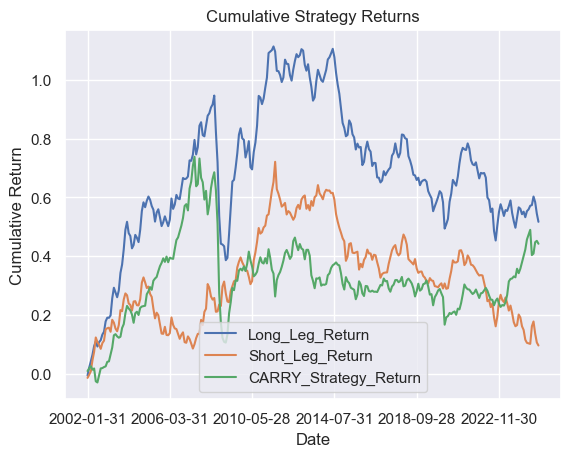

In [73]:
# Example: Plot cumulative returns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
cumulative_returns = (1 + long_short_strategy_returns).cumprod() -1
cumulative_returns.plot(title='Cumulative Strategy Returns')
plt.ylabel('Cumulative Return')
plt.xlabel('Date')
plt.grid(True)
plt.show()


### (c) Regression

In [76]:
import pandas as pd
import statsmodels.api as sm

# Load the data of DIV strategy and set 'date' as the index
DIV_return = pd.read_csv("returns_rp_hedged.csv", parse_dates=['date'])
DIV_return.set_index('date', inplace=True)

#Set carry strategy df
CARRY_return =  long_short_strategy_returns.drop(['Long_Leg_Return','Short_Leg_Return'], axis=1)
CARRY_return.index = pd.to_datetime(CARRY_return.index)

#Arrange the datetime
CARRY_return.index = CARRY_return.index + pd.offsets.MonthEnd(0)
DIV_return.index = DIV_return.index + pd.offsets.MonthEnd(0)

#Merge
returns_df = pd.concat([CARRY_return, DIV_return], axis=1, join='inner')
returns_df.columns = ['CARRY', 'DIV']

#Drop missing values to avoid bias in regression
returns_df = returns_df.dropna()

# Set up the regression model: regress MOM returns on DIV returns
X = sm.add_constant(returns_df['DIV'])  # add intercept (constant term α)
y = returns_df['CARRY']
model = sm.OLS(y, X).fit()

# 4. Display the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  CARRY   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     6.177
Date:                Sat, 14 Jun 2025   Prob (F-statistic):             0.0137
Time:                        16:22:56   Log-Likelihood:                 499.16
No. Observations:                 213   AIC:                            -994.3
Df Residuals:                     211   BIC:                            -987.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0007      0.002     -0.428      0.6

## **(7) Currency Dollar Strategy**

### **(a)** computing the returns of the dollar strategy

In [123]:
df = pd.read_csv('merged_all_data.csv', index_col=0)

df = df.drop(columns={col for col in df.columns if col.startswith(('fic', 'currency'))})
mapping = {
    'AUSTRALIA' : 'AUS',
    'SWITZERLAND' : 'CHE',
    'GERMANY' : 'DEU',
    'FRANCE' : 'FRA',
    'UNITED KINGDOM' : 'UK',
    'JAPAN' : 'JPN'
}
columns_to_rename = {col for col in df.columns if col.split('_')[-1] in mapping.keys()}

df = df.rename(columns={col: col.replace(col.split('_')[1], mapping[col.split('_')[1]]) for col in columns_to_rename})


df['fx_USSZ'] = 1 / df['fx_SZUS']
df['fx_USJP'] = 1 / df['fx_JPUS']

df = df.drop(columns=['fx_SZUS', 'fx_JPUS'])


mapping_fx_columns = {
    'fx_USUK' : 'fx_US_UK',
    'fx_USAL' : 'fx_US_AL',
    'fx_USEU' : 'fx_US_EUR',
    'fx_USSZ' : 'fx_US_CHF',
    'fx_USJP' : 'fx_US_JPY'
}

fx_columns = [col for col in df.columns if col.startswith('fx_')]

df = df.rename(columns={col: mapping_fx_columns[col] for col in fx_columns if col in fx_columns})

fx_columns = [ col for col in df.columns if col.startswith('fx_') and not col.endswith('_ret') ]

for fx_col in fx_columns:
    df[f'{fx_col}_ret'] = df[fx_col].pct_change()
    df[f'{fx_col}_ret'] = df[f'{fx_col}_ret'].shift(-1)


fx_mapping = {
    'AUS': 'fx_US_AL_ret',
    'CHE': 'fx_US_CHF_ret',
    'DEU': 'fx_US_EUR_ret',
    'FRA': 'fx_US_EUR_ret',
    'UK': 'fx_US_UK_ret',
    'JPN': 'fx_US_JPY_ret'
}

for col in [col for col in df.columns if col.startswith('mportret_')]:
    
    df[f'{col}_us_adjusted'] = df[col] * ( 1 + df[fx_mapping[col.split('_')[1]]])


interbank_mapping = {
    'uk' : 'UK_interbank',
    'japan': 'JPY_interbank', 
    'ch' : 'CHF_interbank',
    'us' : 'US_interbank',
    'australia': 'AUD_interbank',
    'euro' : 'EUR_interbank'
}

df = df.rename(columns={col: interbank_mapping[col.split('_')[0]] for col in df.columns if col.endswith('interbank')})

for col in [col for col in df.columns if col.endswith('interbank')]:
    
    df[f"rf_{col.split('_')[0]}_monthly"] = df[col] / 12 / 100


hedging_mapping = {
    'fx_US_CHF_ret': 'rf_CHF_monthly',
    'fx_US_JPY_ret': 'rf_JPY_monthly',
    'fx_US_UK_ret': 'rf_UK_monthly',
    'fx_US_AL_ret': 'rf_AUD_monthly',
    'fx_US_EUR_ret': 'rf_EUR_monthly',
}

columns_hedging = [col for col in hedging_mapping.keys()]

for col in columns_hedging:
    df[f'{col}_hedging'] = (1 + df[col]) * ( 1 + df[hedging_mapping[col]]) - ( 1 + df['rf_US'] )

mapping_currency_hedged = { 
    'mportret_AUS_us_adjusted': 'fx_US_AL_ret_hedging',
    'mportret_CHE_us_adjusted': 'fx_US_CHF_ret_hedging',
    'mportret_DEU_us_adjusted': 'fx_US_EUR_ret_hedging',
    'mportret_FRA_us_adjusted': 'fx_US_EUR_ret_hedging',
    'mportret_UK_us_adjusted': 'fx_US_UK_ret_hedging',
    'mportret_JPN_us_adjusted': 'fx_US_JPY_ret_hedging'
}

for col in mapping_currency_hedged.keys():
    df[f'{col}_hedged'] = df[col] - df[mapping_currency_hedged[col]]


In [124]:
df.head()

mportret_AUS  mportretx_AUS  mportret_CHE  mportretx_CHE  \
date                                                                   
2002-01-31  0.0273578567   0.0273132504 -0.0221262830  -0.0221460495   
2002-02-28 -0.0018319390  -0.0043578687  0.0116607107   0.0116456861   
2002-03-28  0.0051988097  -0.0019141565  0.0487594286   0.0455697800   
2002-04-30 -0.0143019767  -0.0154244722 -0.0041086009  -0.0079612276   
2002-05-31 -0.0002037861  -0.0017515748  0.0029628768  -0.0006387405   

            mportret_DEU  mportretx_DEU  mportret_FRA  mportretx_FRA  \
date                                                                   
2002-01-31  0.0122772449   0.0114909316 -0.0271048471  -0.0273056737   
2002-02-28 -0.0088072175  -0.0088160069 -0.0043939683  -0.0044474921   
2002-03-28  0.0493281250   0.0484695259  0.0520810150   0.0519427042   
2002-04-30 -0.0450305093  -0.0470927763 -0.0439877142  -0.0457546292   
2002-05-31 -0.0257027573  -0.0330684684 -0.0280161336  -0.0354866432   

             mportret_UK  mportretx_UK  mportret_JPN  mportretx_JPN  \
date                                                                  
2002-01-31 -0.0108660983 -0.0117199174 -0.0566551494  -0.0567096311   
2002-02-28 -0.0033406566 -0.0070717255  0.0422556653   0.0419976718   
2002-03-28  0.0389300664  0.0336609706  0.0531190903   0.0482940937   
2002-04-30 -0.0133618832 -0.0154110309  0.0205859787   0.0205737687   
2002-05-31 -0.0114824631 -0.0139372028  0.0359872785   0.0359202084   

                   rm_US        rf_US     fx_US_UK     fx_US_AL    fx_US_EUR  \
date                                                                           
2002-01-31 -0.0159660000 0.0014079107 1.4322000000 0.5170000000 0.8832000000   
2002-02-28 -0.0217000000 0.0014438782 1.4227000000 0.5128000000 0.8707000000   
2002-03-28  0.0446980000 0.0014248364 1.4230000000 0.5256000000 0.8766000000   
2002-04-30 -0.0496000000 0.0014606291 1.4429000000 0.5352000000 0.8860000000   
2002-05-31 -0.0105100000 0.0014079107 1.4598000000 0.5498000000 0.9170000000   

            EUR_interbank  CHF_interbank  US_interbank  AUD_interbank  \
date                                                                    
2002-01-31   3.3387727273   1.6037251429  1.7400000000   4.2600000000   
2002-02-28   3.3571000000   1.5666706000  1.8200000000   4.3100000000   
2002-03-28   3.3908000000   1.6041637500  1.9100000000   4.4600000000   
2002-04-30   3.4069047619   1.4606466190  1.8700000000   4.5900000000   
2002-05-31   3.4671363636   1.1634939000  1.8200000000   4.8400000000   

            JPY_interbank  UK_interbank    fx_US_CHF    fx_US_JPY  \
date                                                                
2002-01-31            NaN  4.0467700000 0.5984798612 0.0075367435   
2002-02-28            NaN  4.0526800000 0.5892751915 0.0074826440   
2002-03-28            NaN  4.1305500000 0.5972645285 0.0076300349   
2002-04-30   0.1000000000  4.1731900000 0.6045218232 0.0076469086   
2002-05-31   0.0800000000  4.1537000000 0.6293662282 0.0079129575   

            fx_US_UK_ret  fx_US_AL_ret  fx_US_EUR_ret  fx_US_CHF_ret  \
date                                                                   
2002-01-31 -0.0066331518 -0.0081237911  -0.0141530797  -0.0153800825   
2002-02-28  0.0002108667  0.0249609984   0.0067761571   0.0135579048   
2002-03-28  0.0139845397  0.0182648402   0.0107232489   0.0121508886   
2002-04-30  0.0117125234  0.0272795217   0.0349887133   0.0410976147   
2002-05-31  0.0163721058  0.0334667152   0.0426390403   0.0318202481   

            fx_US_JPY_ret  mportret_AUS_us_adjusted  mportret_CHE_us_adjusted  \
date                                                                            
2002-01-31  -0.0071781004              0.0271356072             -0.0217859789   
2002-02-28   0.0196976980             -0.0018776660              0.0118188055   
2002-03-28   0.0022114860              0.0052937651              0.0493518990   
2002-04-30   0.0347916914            

In [125]:
columns_dollar_strat = [col for col in df.columns if col.startswith('fx_') and col.endswith('_hedging')]

df_dollar_strat = df[columns_dollar_strat]
df_dollar_strat['rf_US'] = df['rf_US']

df_dollar_strat.head()

/var/folders/_s/jd19jm5x0bj6k6nfh5q_1n700000gn/T/ipykernel_61308/2143541223.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dollar_strat['rf_US'] = df['rf_US']


fx_US_CHF_ret_hedging  fx_US_JPY_ret_hedging  \
date                                                       
2002-01-31          -0.0154721101                    NaN   
2002-02-28           0.0134372861                    NaN   
2002-03-28           0.0120790987                    NaN   
2002-04-30           0.0409042153           0.0334172949   
2002-05-31           0.0314127679           0.0236785721   

            fx_US_UK_ret_hedging  fx_US_AL_ret_hedging  fx_US_EUR_ret_hedging  \
date                                                                            
2002-01-31         -0.0046911232         -0.0060105412          -0.0128180580   
2002-02-28          0.0021449339          0.0271984385           0.0081488191   
2002-03-28          0.0160499649          0.0206245548           0.0121543795   
2002-04-30          0.0137702847          0.0297482367           0.0364665075   
2002-05-31          0.0184822824          0.0362271203           0.0442436061   

                  rf_US  
date                     
2002-01-31 0.0014079107  
2002-02-28 0.0014438782  
2002-03-28 0.0014248364  
2002-04-30 0.0014606291  
2002-05-31 0.0014079107

In [126]:
df_dollar_strat['dollar_strat_ret'] = df_dollar_strat[columns_dollar_strat].mean(axis=1)

df_dollar_strat.head()

/var/folders/_s/jd19jm5x0bj6k6nfh5q_1n700000gn/T/ipykernel_61308/4024952479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dollar_strat['dollar_strat_ret'] = df_dollar_strat[columns_dollar_strat].mean(axis=1)


fx_US_CHF_ret_hedging  fx_US_JPY_ret_hedging  \
date                                                       
2002-01-31          -0.0154721101                    NaN   
2002-02-28           0.0134372861                    NaN   
2002-03-28           0.0120790987                    NaN   
2002-04-30           0.0409042153           0.0334172949   
2002-05-31           0.0314127679           0.0236785721   

            fx_US_UK_ret_hedging  fx_US_AL_ret_hedging  fx_US_EUR_ret_hedging  \
date                                                                            
2002-01-31         -0.0046911232         -0.0060105412          -0.0128180580   
2002-02-28          0.0021449339          0.0271984385           0.0081488191   
2002-03-28          0.0160499649          0.0206245548           0.0121543795   
2002-04-30          0.0137702847          0.0297482367           0.0364665075   
2002-05-31          0.0184822824          0.0362271203           0.0442436061   

                  rf_US  dollar_strat_ret  
date                                       
2002-01-31 0.0014079107     -0.0097479581  
2002-02-28 0.0014438782      0.0127323694  
2002-03-28 0.0014248364      0.0152269995  
2002-04-30 0.0014606291      0.0308613078  
2002-05-31 0.0014079107      0.0308088698

In [127]:
df_dollar_strat['dollar_strat_cumprod'] = (df_dollar_strat['dollar_strat_ret'] + 1).cumprod()

df_dollar_strat.head()

/var/folders/_s/jd19jm5x0bj6k6nfh5q_1n700000gn/T/ipykernel_61308/3152145359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dollar_strat['dollar_strat_cumprod'] = (df_dollar_strat['dollar_strat_ret'] + 1).cumprod()


fx_US_CHF_ret_hedging  fx_US_JPY_ret_hedging  \
date                                                       
2002-01-31          -0.0154721101                    NaN   
2002-02-28           0.0134372861                    NaN   
2002-03-28           0.0120790987                    NaN   
2002-04-30           0.0409042153           0.0334172949   
2002-05-31           0.0314127679           0.0236785721   

            fx_US_UK_ret_hedging  fx_US_AL_ret_hedging  fx_US_EUR_ret_hedging  \
date                                                                            
2002-01-31         -0.0046911232         -0.0060105412          -0.0128180580   
2002-02-28          0.0021449339          0.0271984385           0.0081488191   
2002-03-28          0.0160499649          0.0206245548           0.0121543795   
2002-04-30          0.0137702847          0.0297482367           0.0364665075   
2002-05-31          0.0184822824          0.0362271203           0.0442436061   

                  rf_US  dollar_strat_ret  dollar_strat_cumprod  
date                                                             
2002-01-31 0.0014079107     -0.0097479581          0.9902520419  
2002-02-28 0.0014438782      0.0127323694          1.0028602967  
2002-03-28 0.0014248364      0.0152269995          1.0181308499  
2002-04-30 0.0014606291      0.0308613078          1.0495516995  
2002-05-31 0.0014079107      0.0308088698          1.0818872011

### **(b)** Sharpe and statistics

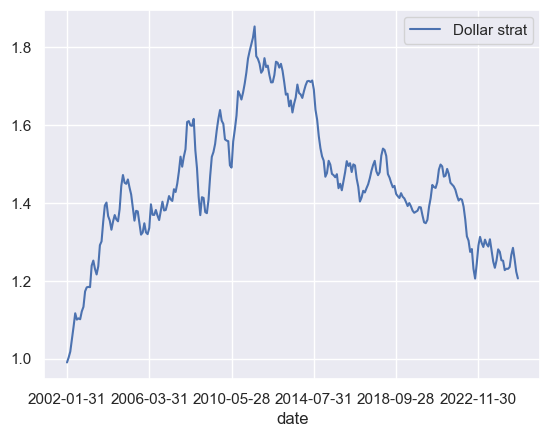

In [128]:
df_dollar_strat['dollar_strat_cumprod'].plot()

plt.legend(['Dollar strat'])
plt.show()

In [129]:
sharpe_dollar_strat = compute_sharpe_ratio( df_dollar_strat['dollar_strat_ret'], df_dollar_strat['rf_US'])

print(f'The Sharpe ratio of the dollar strategy is : {sharpe_dollar_strat}')
print(f'The mean of returns is : {df_dollar_strat["dollar_strat_ret"].mean()}')
print(f'The std of returns is : {df_dollar_strat["dollar_strat_ret"].std()}')


The Sharpe ratio of the dollar strategy is : -0.3695633885609658
The mean of returns is : 0.000836009452706871
The std of returns is : 0.017681474678803946


In [130]:
from scipy import stats

# Example: replace this with your actual returns series
returns = df_dollar_strat['dollar_strat_ret'].dropna().values

# One-sample t-test against 0
t_stat, p_value = stats.ttest_1samp(returns, 0)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: the mean return is significantly different from 0.")
else:
    print("Fail to reject the null hypothesis: no significant evidence the mean return differs from 0.")


T-statistic: 0.7841
P-value: 0.4337
Fail to reject the null hypothesis: no significant evidence the mean return differs from 0.


### **(c)** Regression with the DIV returns

In [131]:
div_returns = pd.read_csv('returns_rp_hedged.csv', index_col=0)

div_returns.head()

rp_return
date                    
2007-03-30  0.0000000000
2007-04-30  0.0375115626
2007-05-31  0.0315467024
2007-06-29 -0.0248868875
2007-07-31 -0.0246509511

In [145]:
import statsmodels.api as sm

y = df_dollar_strat['dollar_strat_ret']

X_tamp = sm.add_constant(div_returns['rp_return'].reset_index())

X_tamp = X_tamp.merge(y.reset_index(), on='date', how='left').dropna()

X = X_tamp[['const', 'rp_return']]
y = X_tamp['dollar_strat_ret']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       dollar_strat_ret   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     10.29
Date:                Sat, 14 Jun 2025   Prob (F-statistic):            0.00154
Time:                        16:47:11   Log-Likelihood:                 571.39
No. Observations:                 213   AIC:                            -1139.
Df Residuals:                     211   BIC:                            -1132.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.407e-05      0.001      0.021      0.9